Import The Necessary Libraries

In [61]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as scp;
from sklearn.feature_selection import RFE;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import ExtraTreesRegressor;
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score, roc_auc_score;
import statsmodels.api as apl;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score,KFold;
from sklearn.model_selection import StratifiedKFold;
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,classification_report;
from imblearn.over_sampling import SMOTE ;
from imblearn.under_sampling import NearMiss;
import collections;
from sklearn.linear_model import Ridge;
from numpy import absolute;
from sklearn.model_selection import GridSearchCV;
from numpy import arange;
from sklearn.preprocessing import PowerTransformer;
from sklearn.linear_model import Lasso;
from sklearn.linear_model import ElasticNet;
from sklearn.preprocessing import PowerTransformer;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.svm import SVC;
from sklearn.ensemble import IsolationForest;
from sklearn.preprocessing import FunctionTransformer;
from sklearn.decomposition import PCA;
from sklearn.model_selection import cross_val_score;
import pickle;
import warnings;

warnings.filterwarnings('ignore')






##**Data Preprocessing**



Importing the Data Set and Analysing the Data


In [62]:
df = pd.read_csv("AnomaData.csv");
print(df.info())
print(df.shape)
print(df.describe())
print(df)
print(df.dropna(inplace = True))
print(df.drop_duplicates())
print("Duplicates in the Data",df[df.duplicated()])
df['time'] = pd.to_datetime(df['time'])
print(df['time'].dtype)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y1      18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

Extracting Numerical , Discrete, Categorical Features

In [63]:
feature_having_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('feature having na:- ', feature_having_na);
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O' ]
print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))
categorical_feature = list(set(df.columns)-set(numerical_feature))
print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

descrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))


feature having na:-  []
numerical features are  ['time', 'y1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'y'] count of numerical featuers are  62
categorical_feature are  [] count of categorical_feature are  0
descrete features are  ['y1', 'x28', 'y'] count of descrete_features are  3


##**Exploratory Data Analysis**

Getting the Skewness Of the Data

In [64]:
#finding the null values in the data.
print(df.isnull().sum())
df= df.drop(["time"],axis=1)
print("skewness in the data ", df.skew())



time    0
y1      0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y       0
Length: 62, dtype: int64
skewness in the data  y1     12.058253
x1     -1.247727
x2      0.246201
x3      0.405579
x4      0.125157
         ...    
x57     0.203035
x58    -2.460320
x59    -9.499936
x60     0.479347
y      31.072082
Length: 61, dtype: float64


Analysing the skewness

In [65]:

print(descrete_features)

['y1', 'x28', 'y']


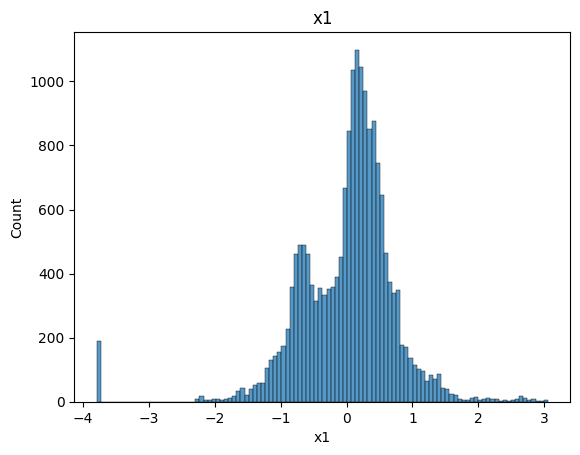

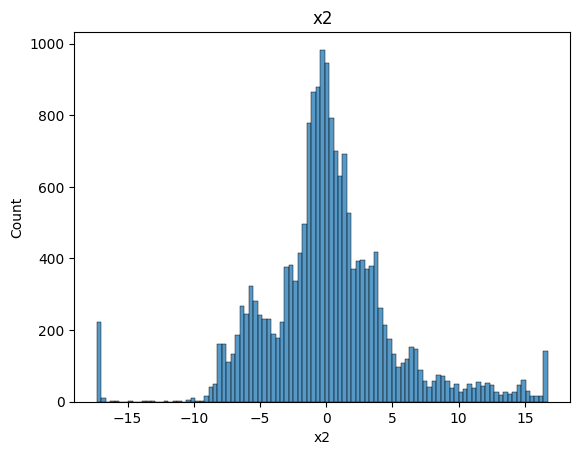

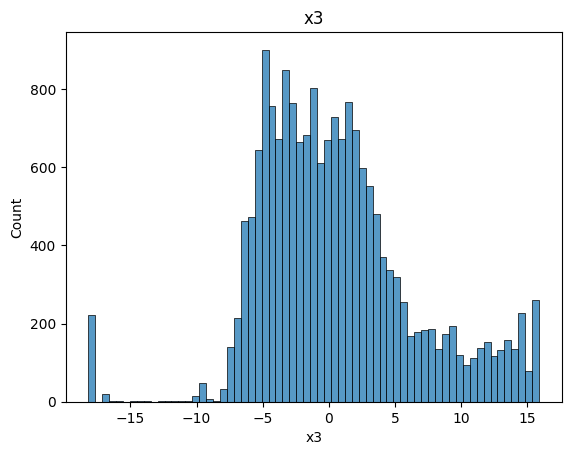

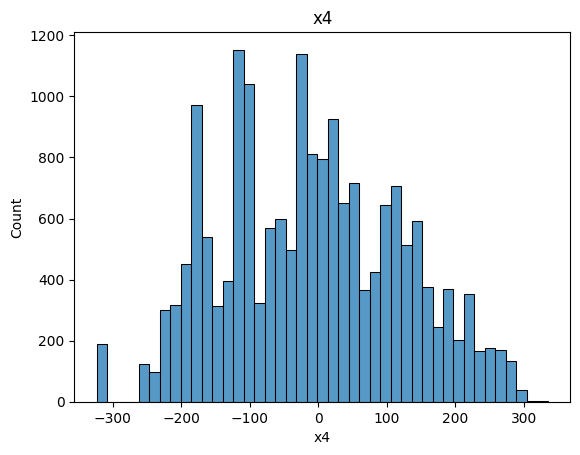

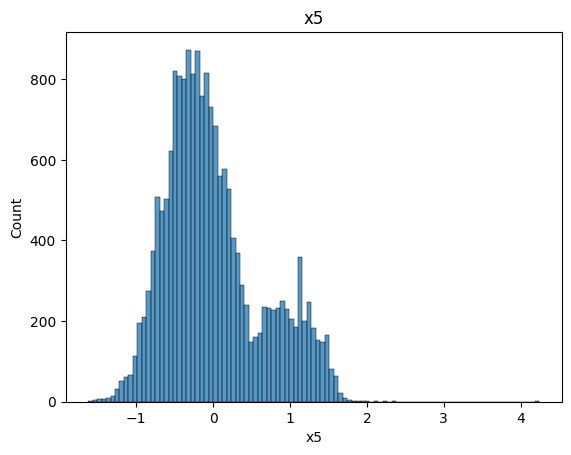

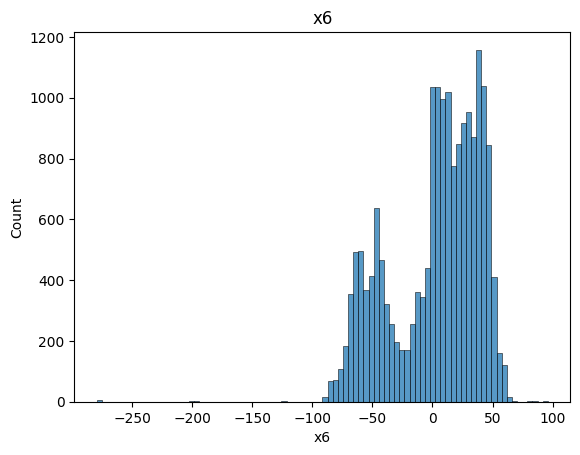

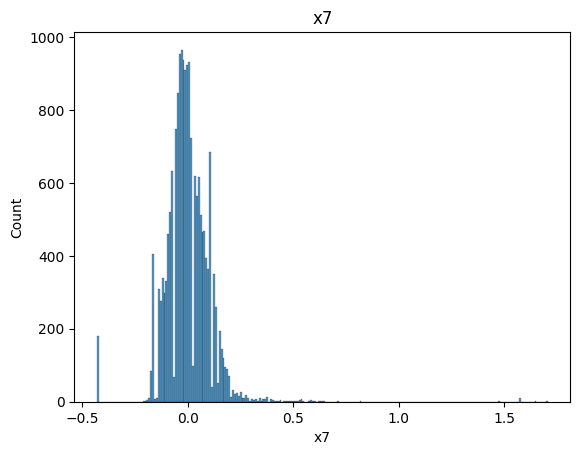

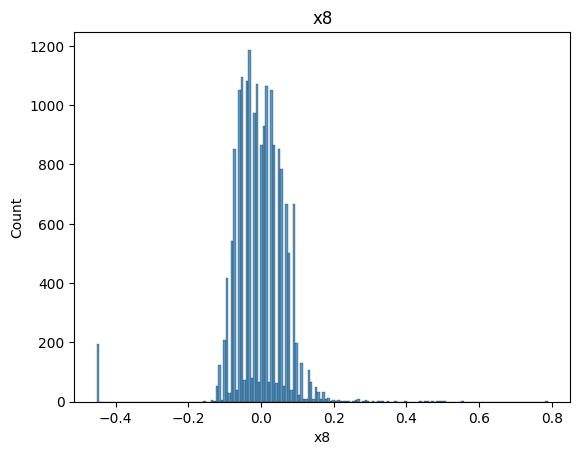

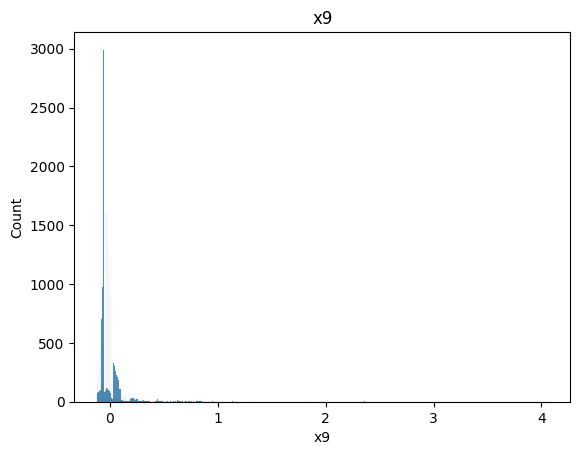

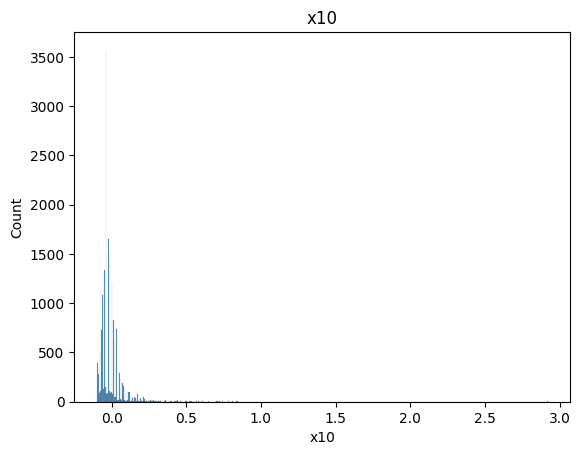

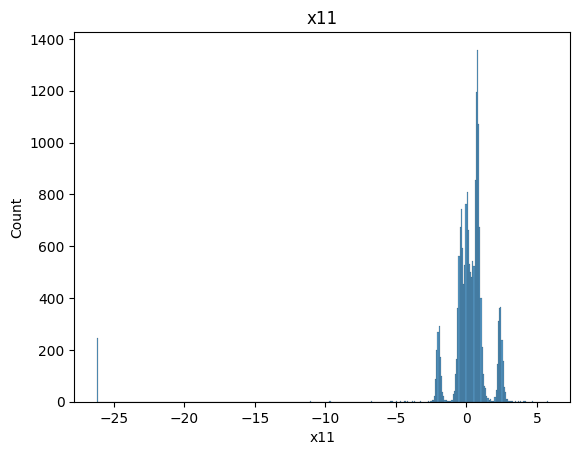

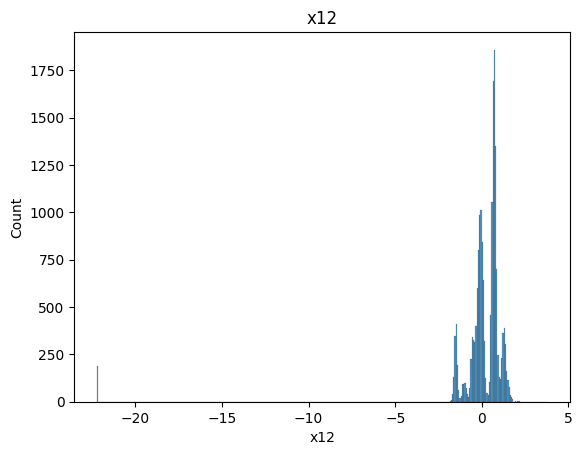

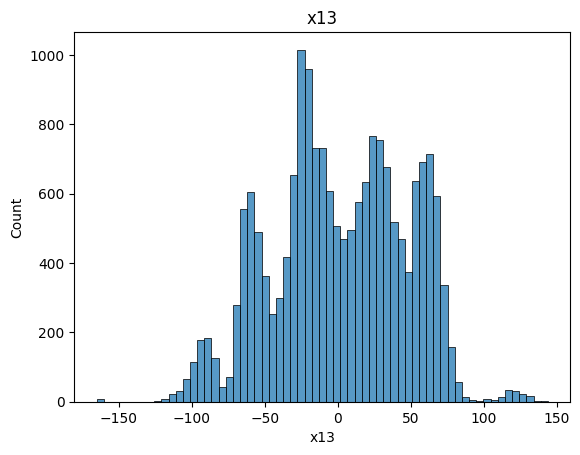

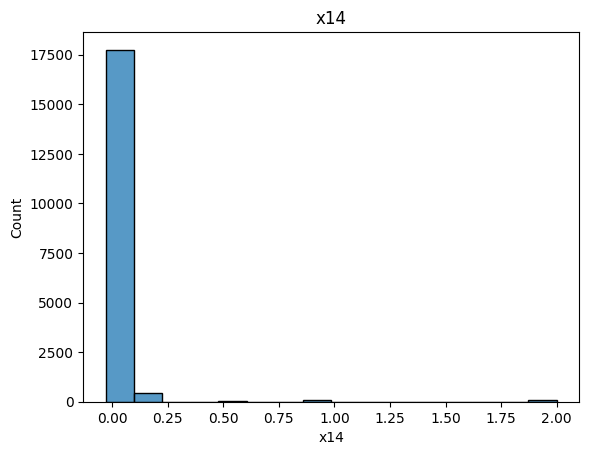

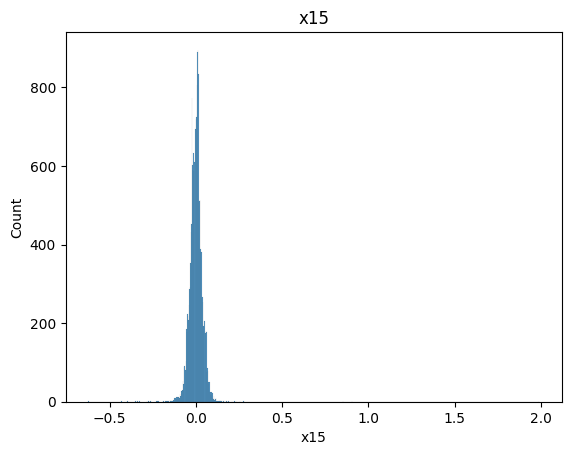

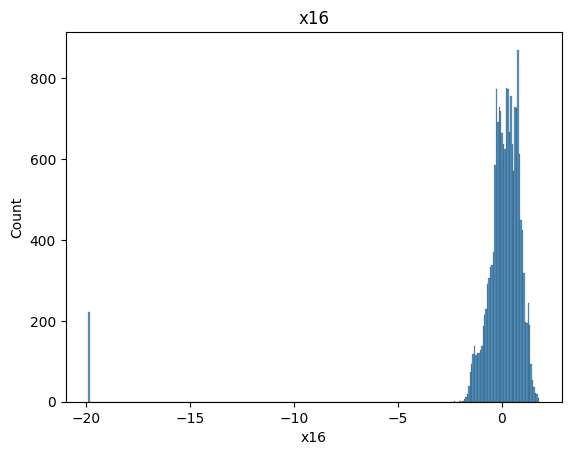

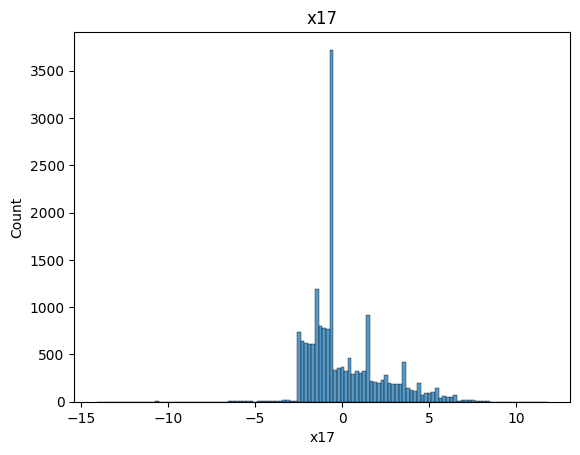

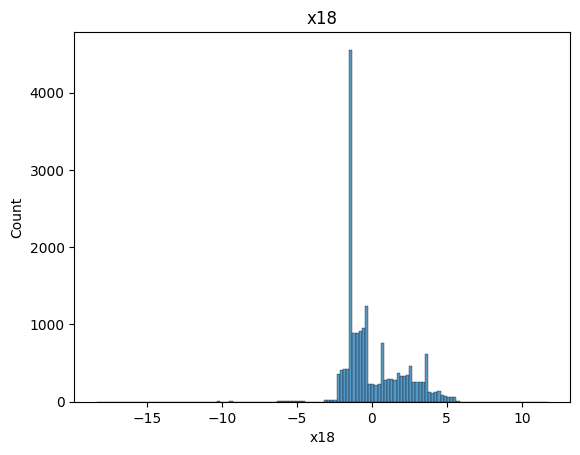

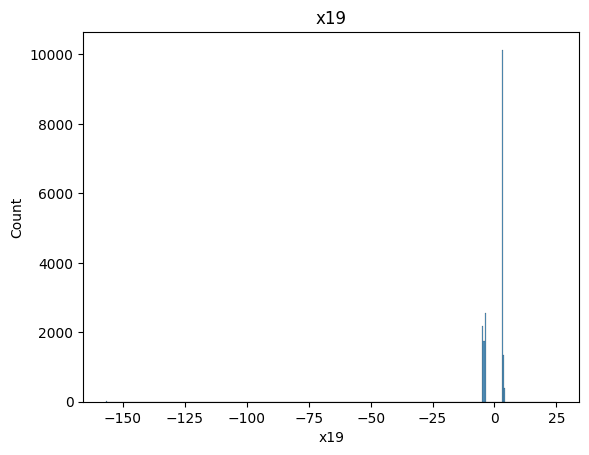

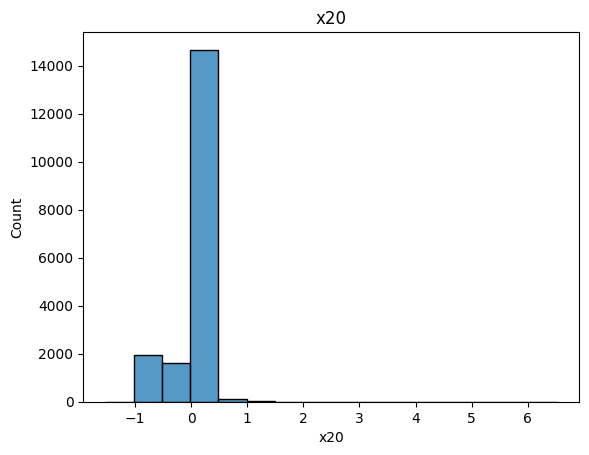

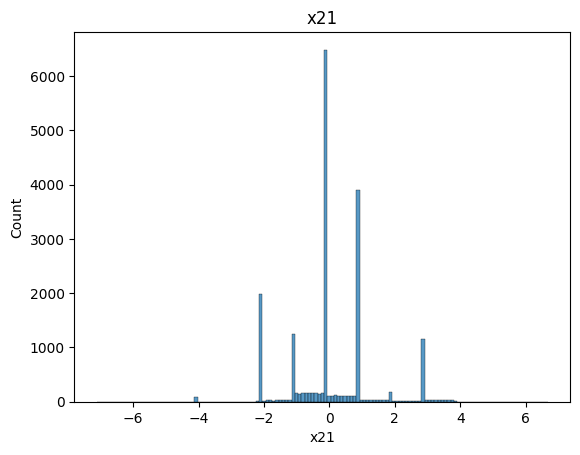

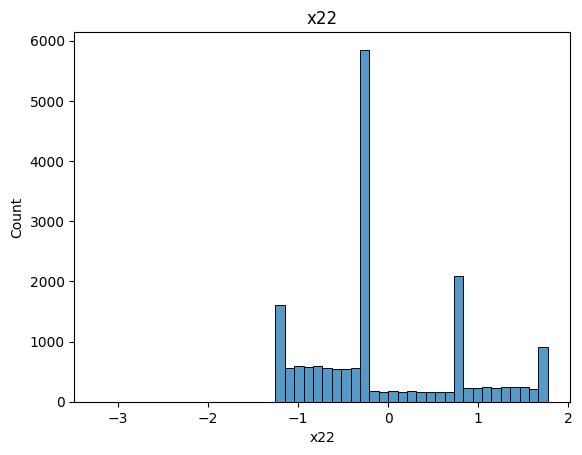

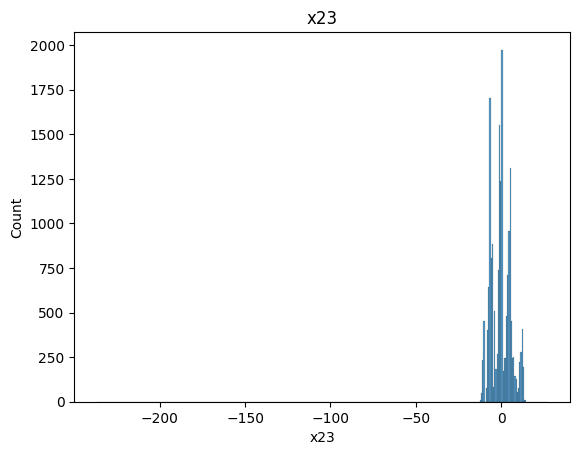

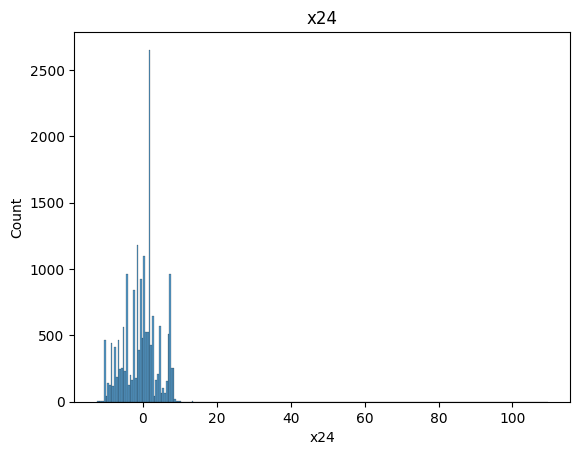

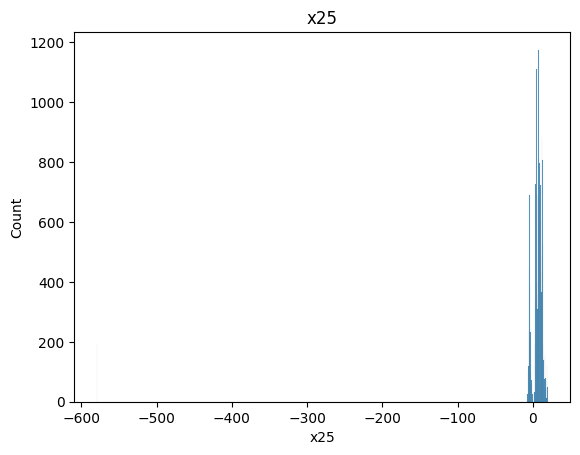

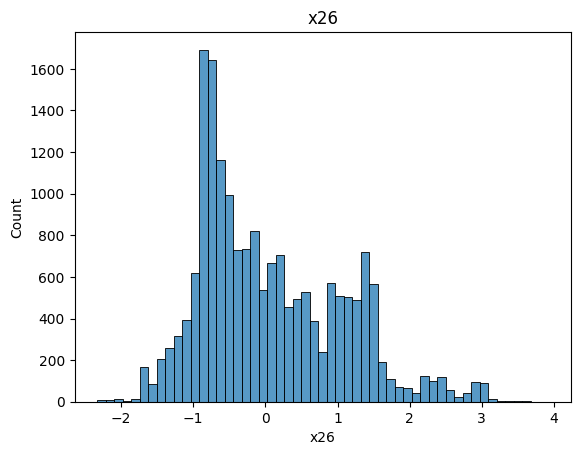

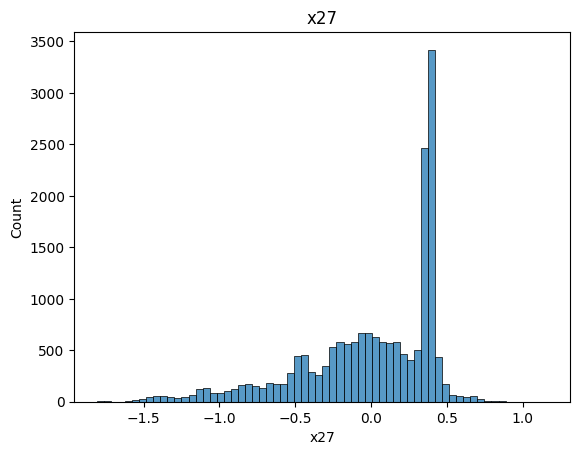

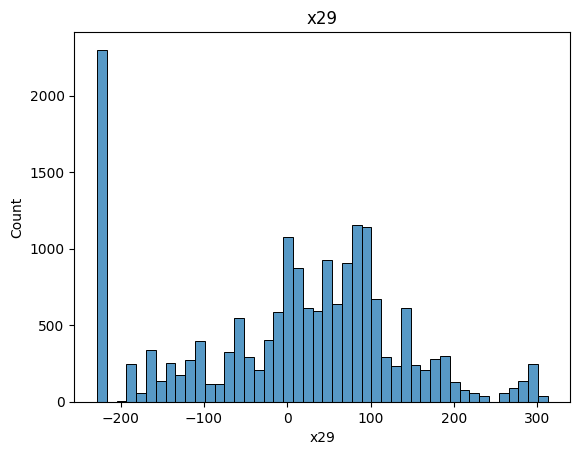

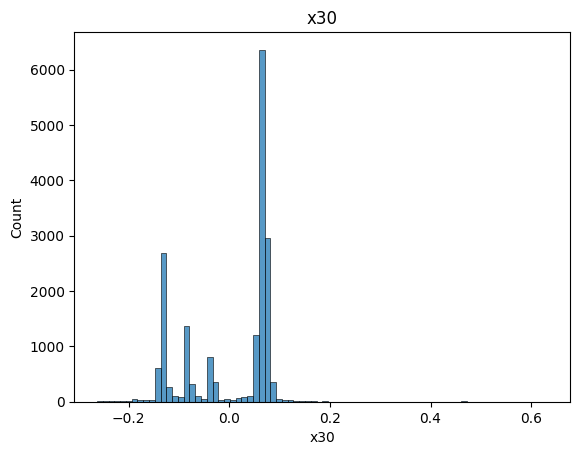

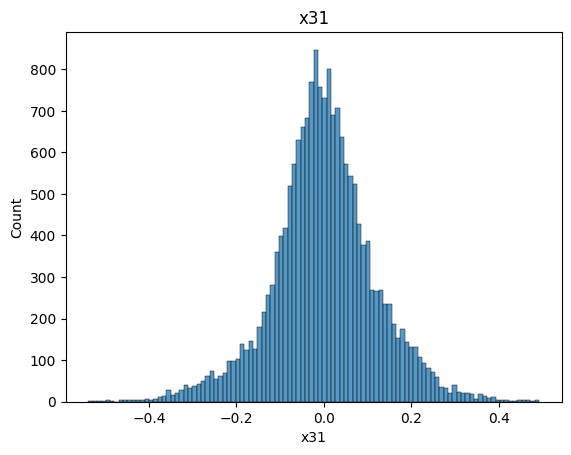

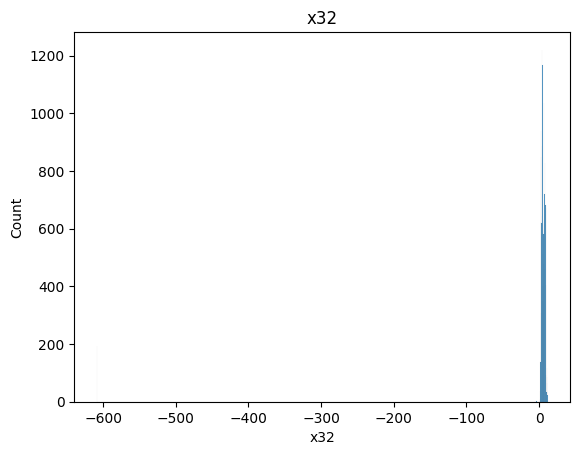

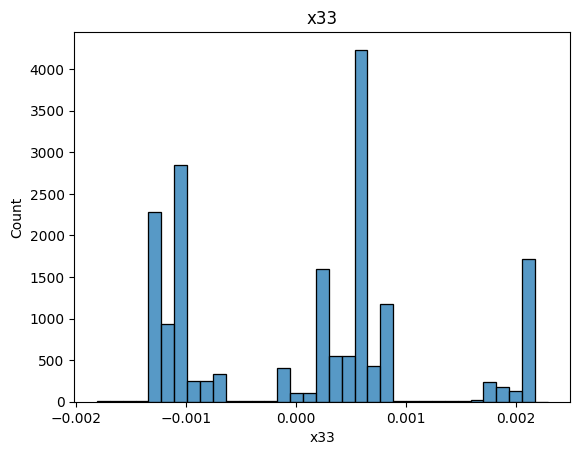

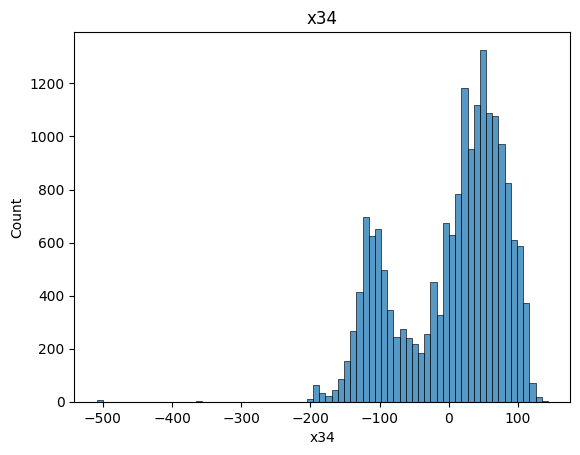

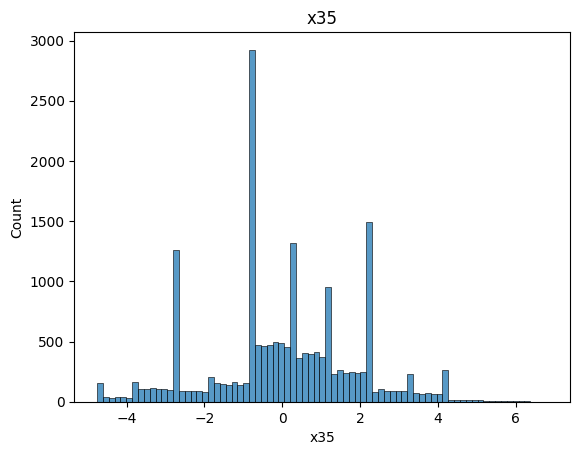

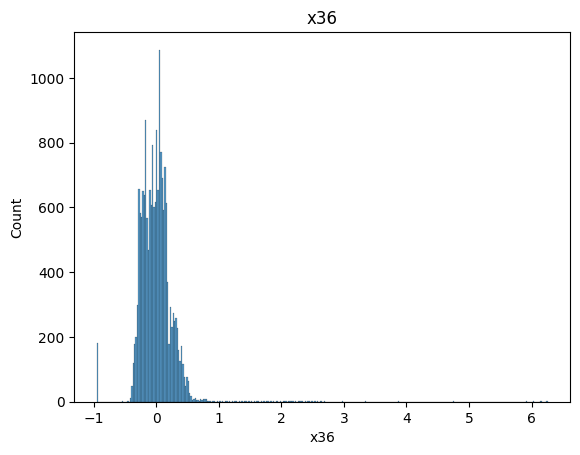

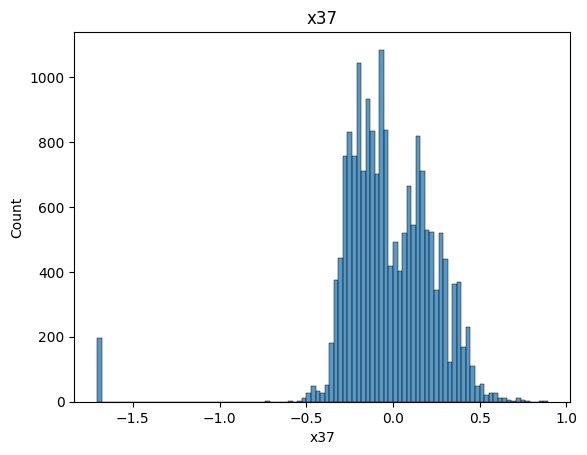

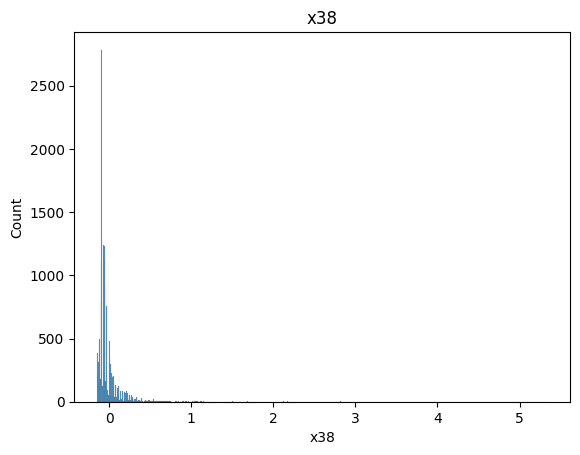

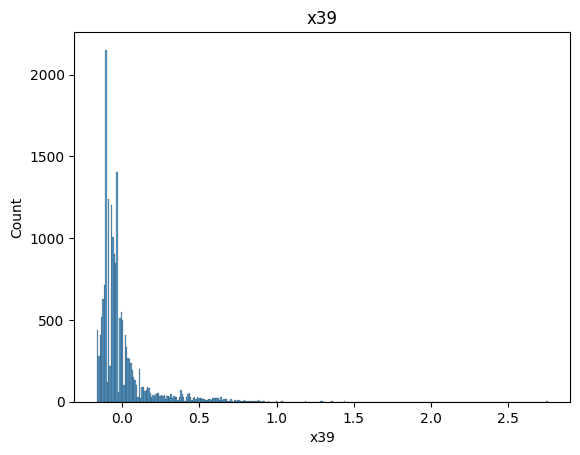

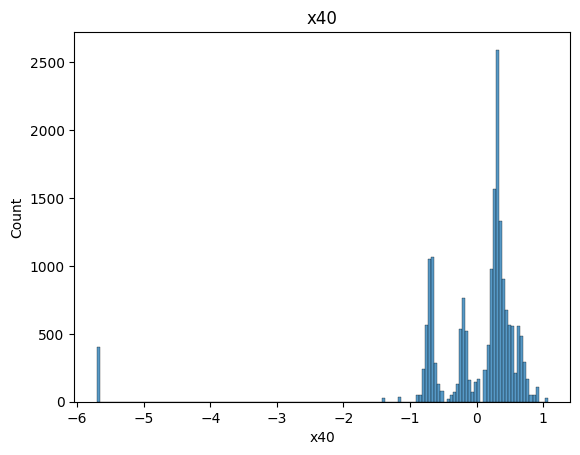

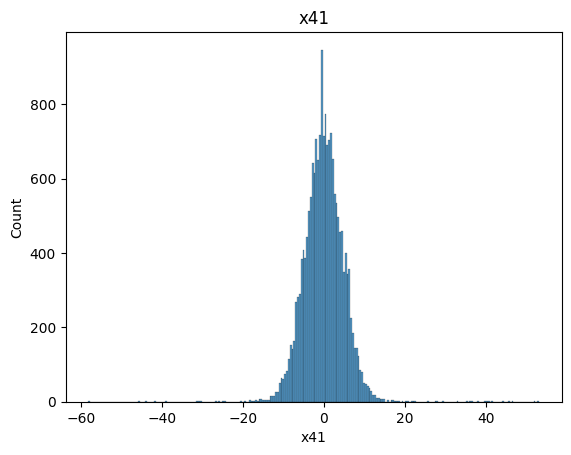

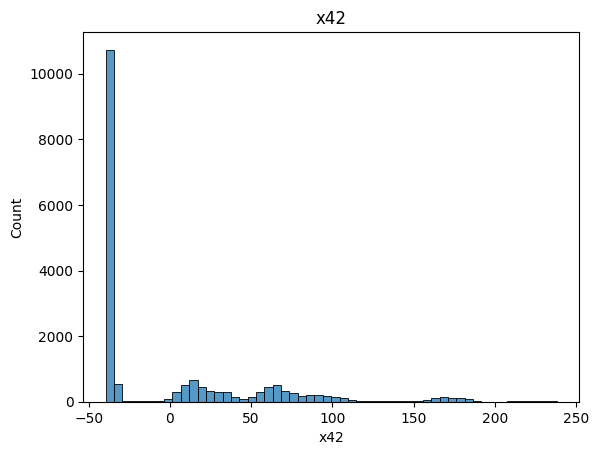

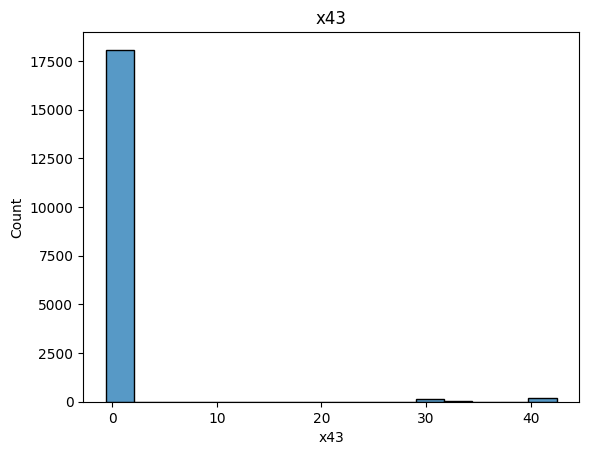

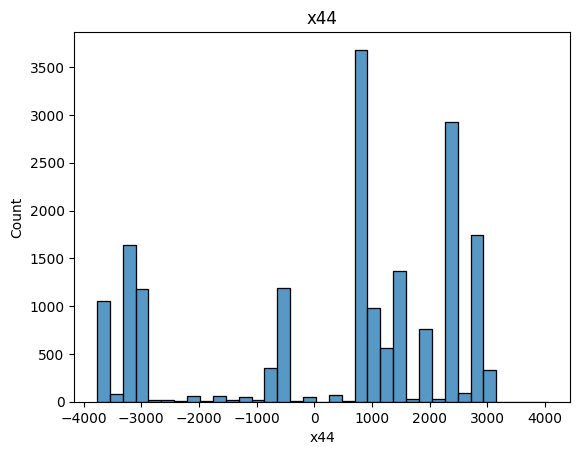

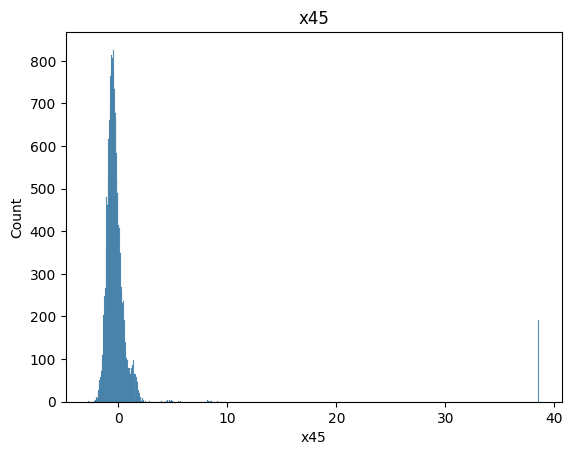

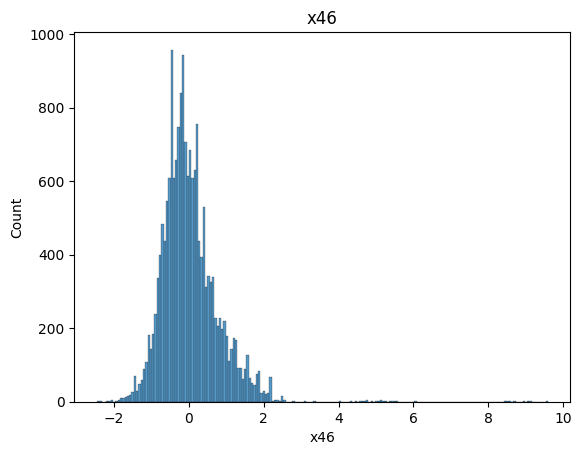

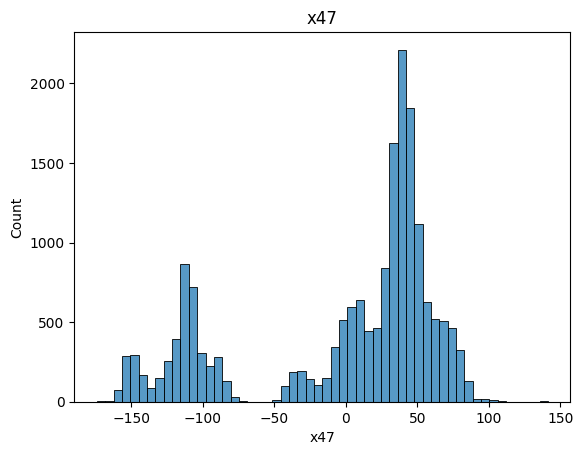

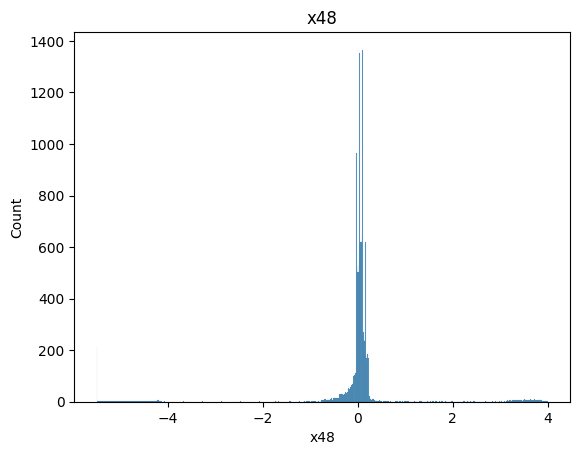

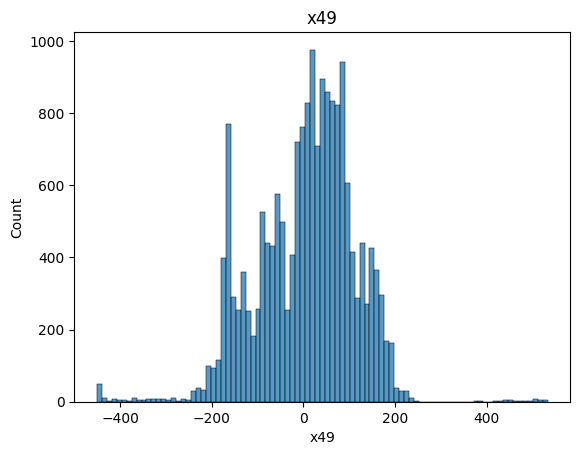

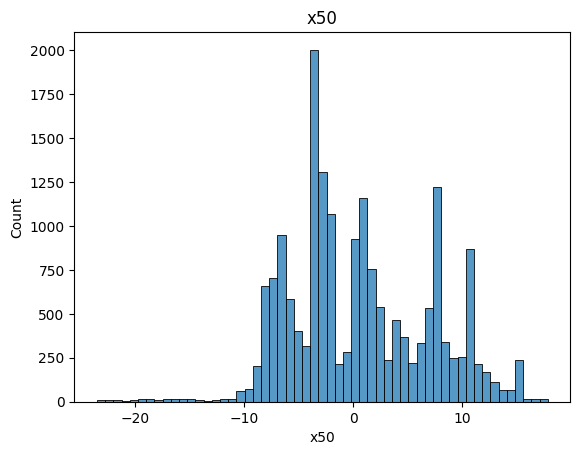

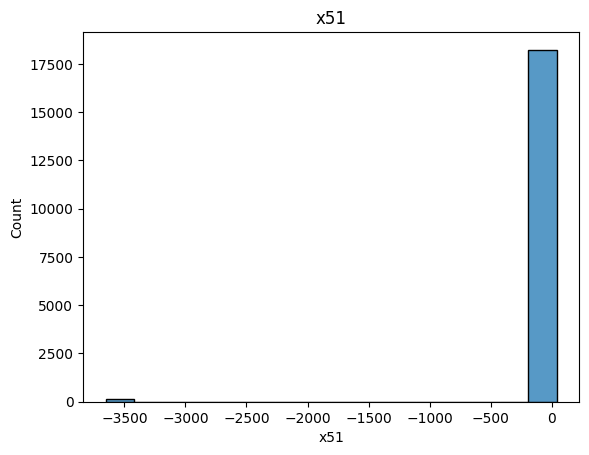

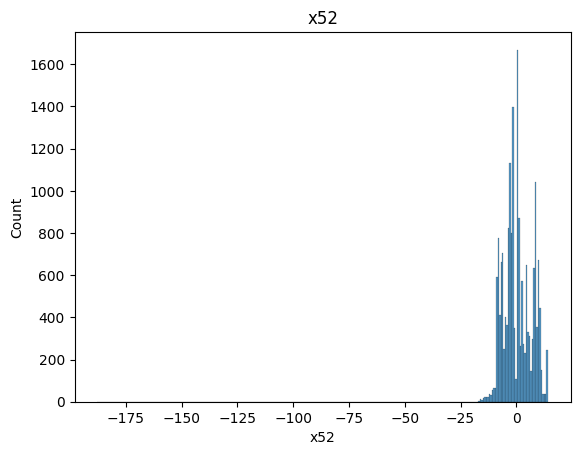

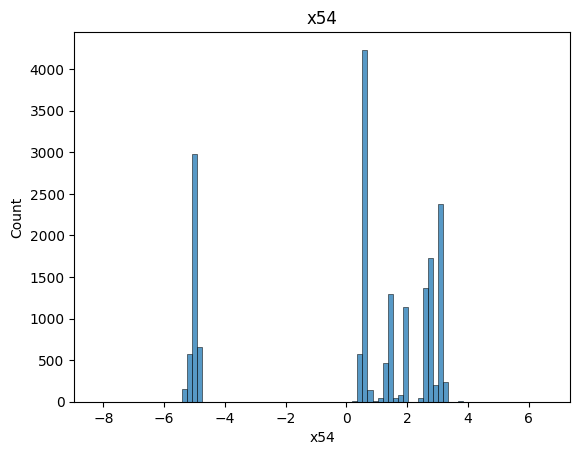

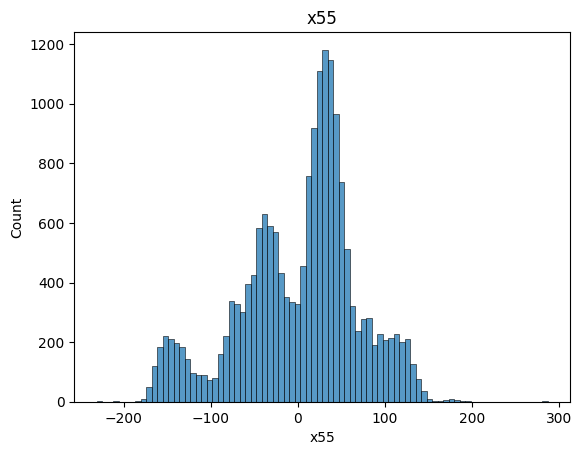

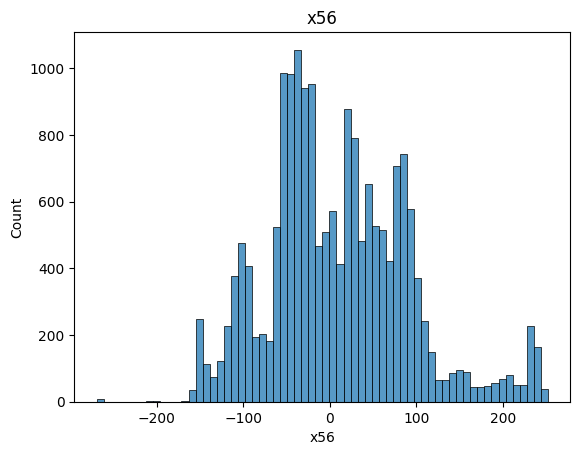

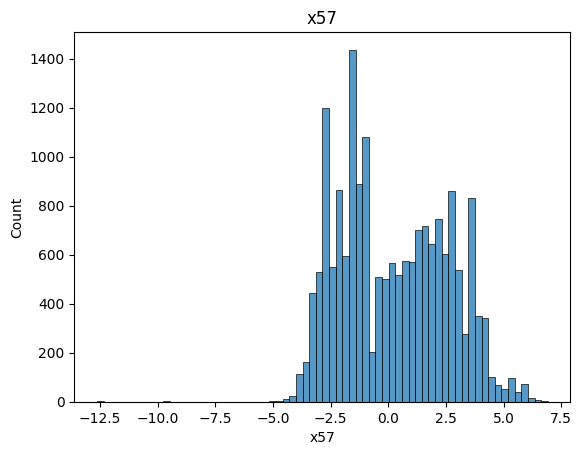

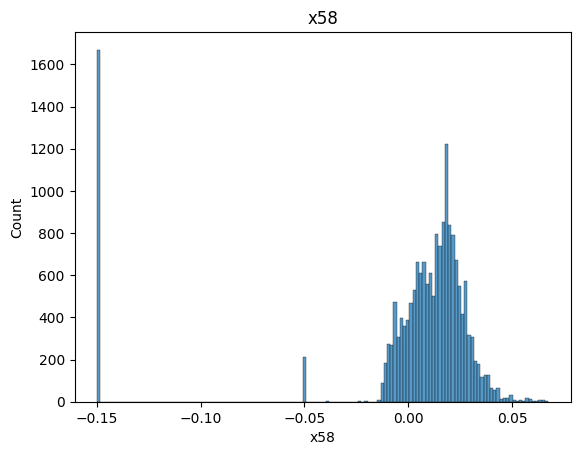

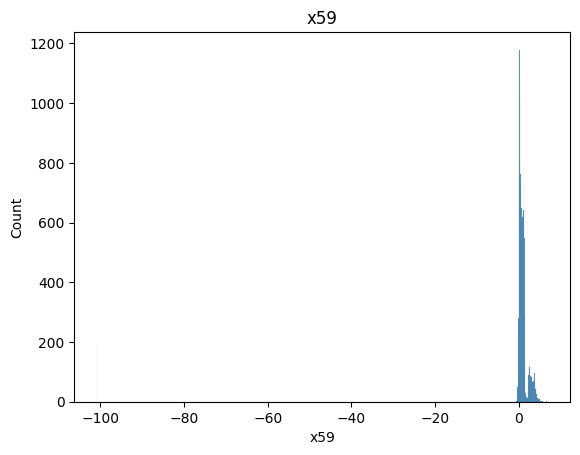

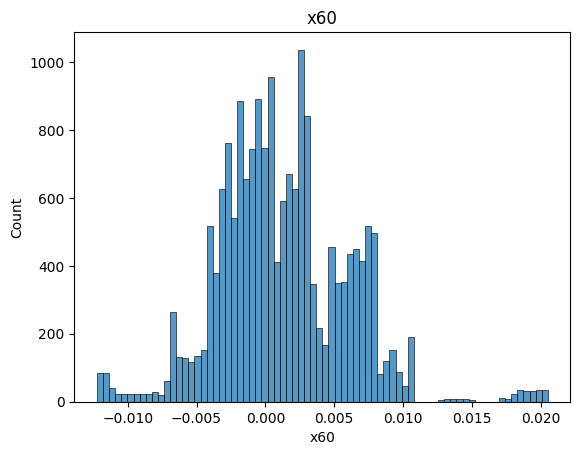

In [66]:
for c in df.select_dtypes(include=[np.number]).columns:
  if c not in descrete_features:

    sns.histplot(df[c])
    plt.title(c)
    plt.show()

Reducing the Skewness of the features

In [67]:
for j in df.select_dtypes(include=[np.number]).columns:
    if j not in descrete_features:

      unique_values = df[j].nunique()

      if (unique_values >= 20):
        if df[j].skew()<(-0.5) :
            print("before skew",df[j].skew())
            df[j],lam = scp.yeojohnson(df[j])
            print("skewed value ",df[j].skew())
            print(df[j].nunique())

        elif df[j].skew()>0.5:
            print(" before skew",df[j].skew())
            df[j],lam1 = scp.yeojohnson(df[j])
            print("skewed value ",df[j].skew())
            print(df[j].nunique())


        else :
          pass;


before skew -1.2477274630379631
skewed value  0.19494148406388756
14091
 before skew 0.6838053106263678
skewed value  0.0018010166898351876
15897
before skew -0.7784217843807856
skewed value  -0.08182684900245743
18253
 before skew 2.435929741220174
skewed value  -0.24349190613633556
2028
before skew -1.6027778536261497
skewed value  0.4448237698359144
1426
 before skew 9.013222877762495
skewed value  0.15422636889129757
2924
 before skew 8.944291636343811
skewed value  0.11934989354424753
2353
before skew -7.186179090124906
skewed value  0.4502950531258182
15466
before skew -8.361979326288775
skewed value  0.2614989443443216
14571
 before skew 10.143996097486266
skewed value  1.9321966323669864
1537
 before skew 7.491856325484421
skewed value  -0.593103431018267
16284
before skew -7.890302961524933
skewed value  0.18021912117286729
13692
 before skew 0.8768263785181173
skewed value  -0.6795951206210635
12910
 before skew 0.6193853339148028
skewed value  -0.8911520380106079
12649
befor

Analysing the Skewness After Reducing high skewed feature to normal distribution

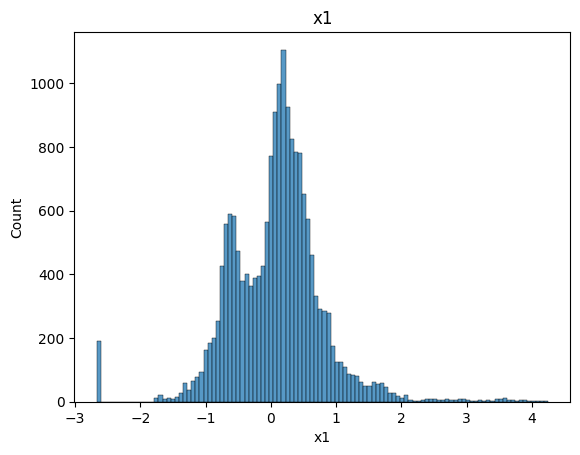

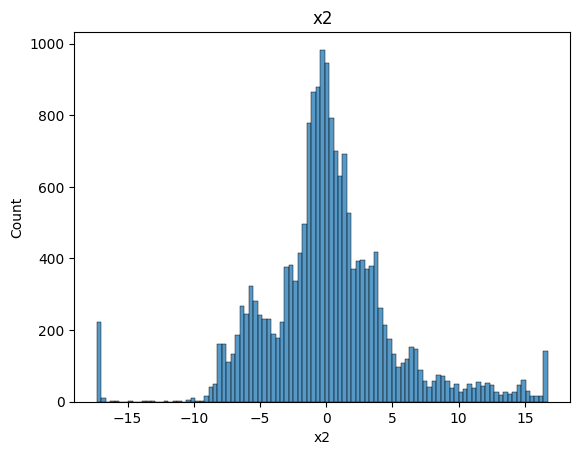

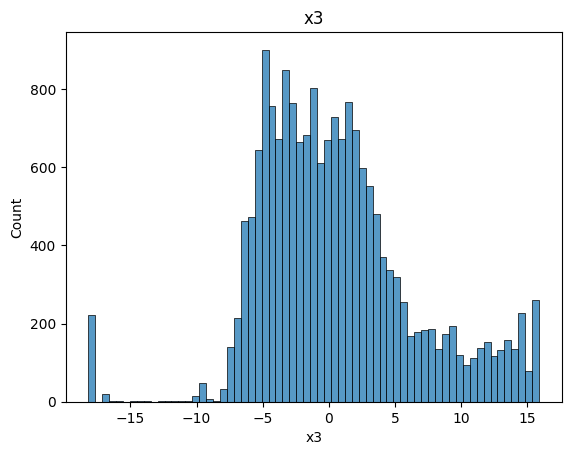

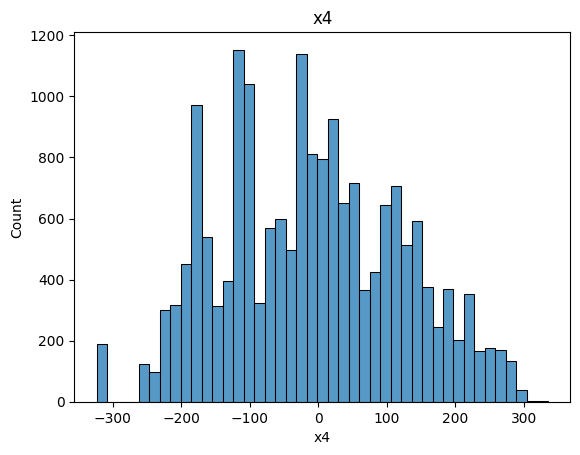

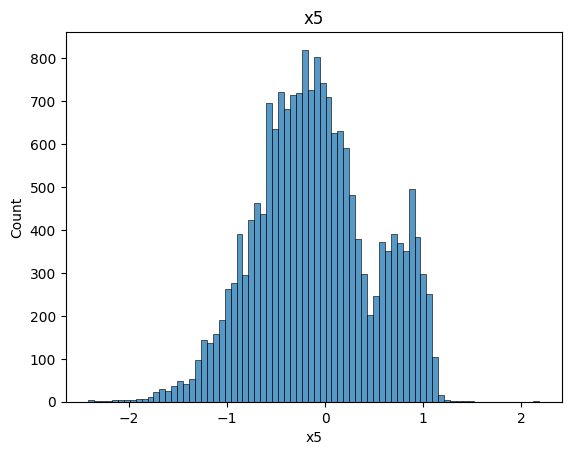

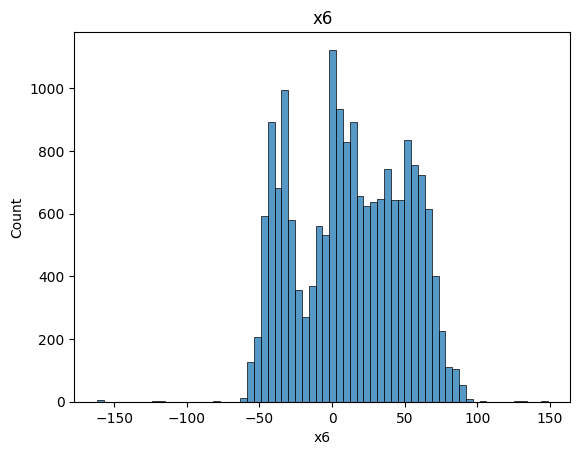

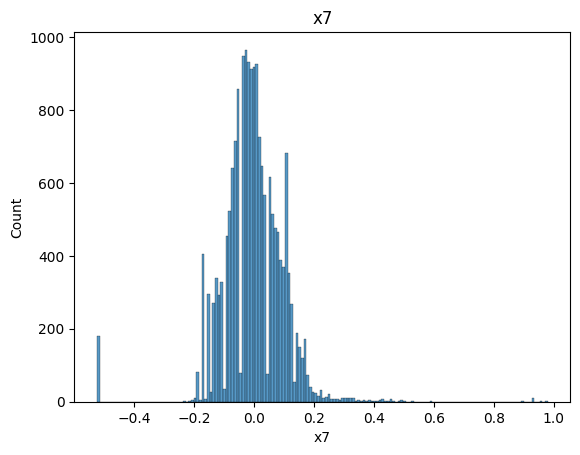

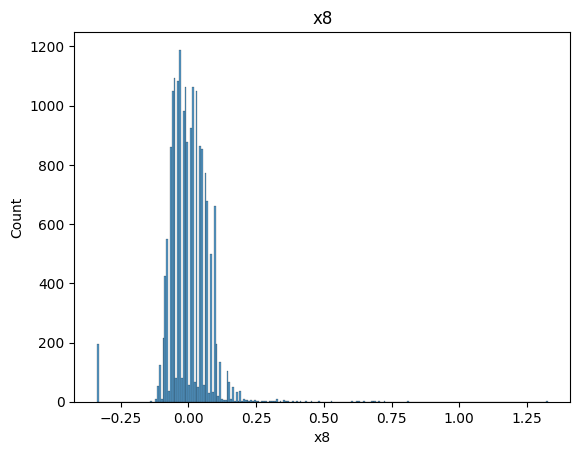

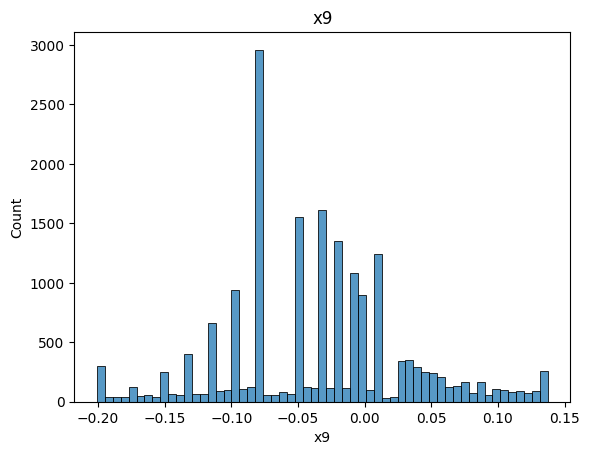

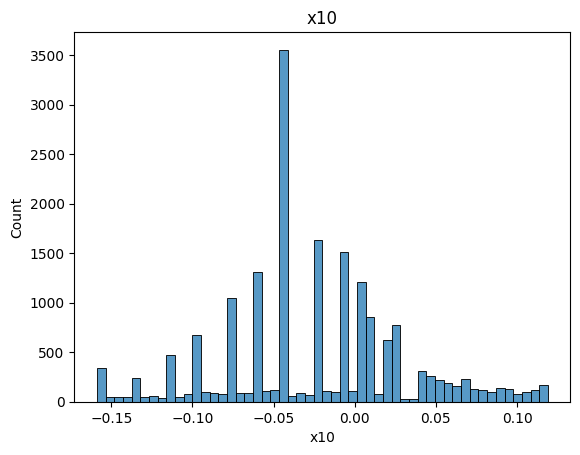

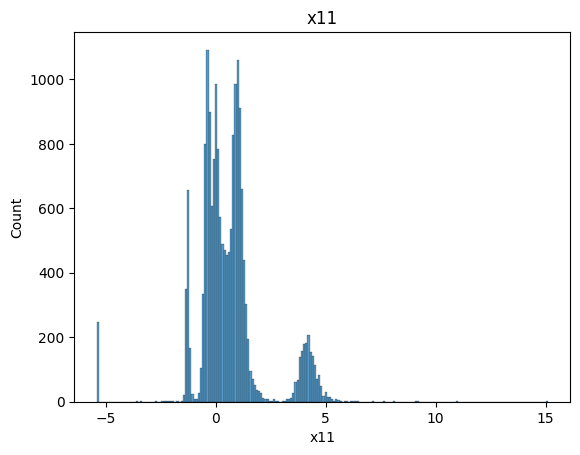

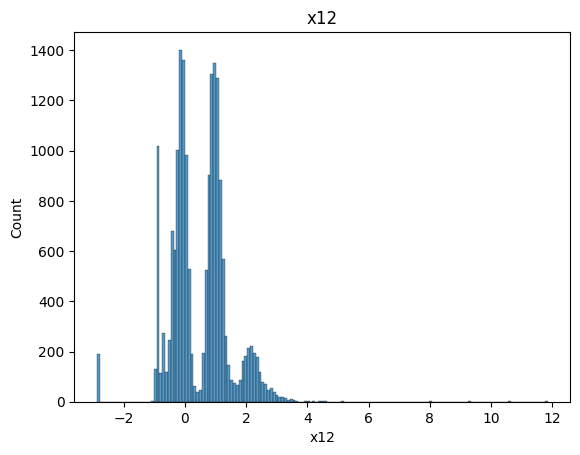

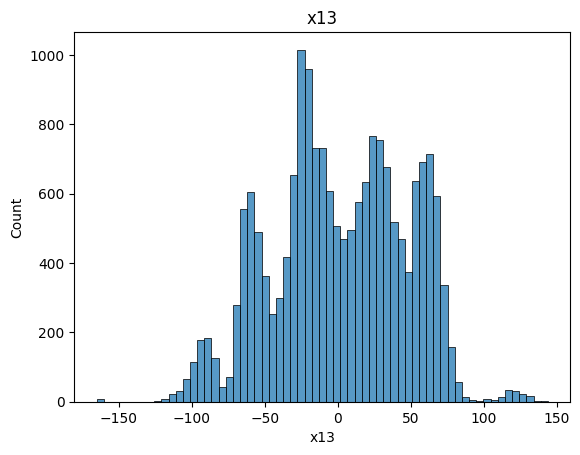

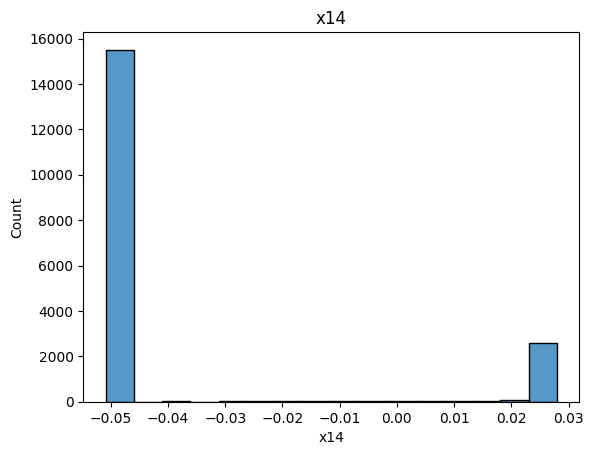

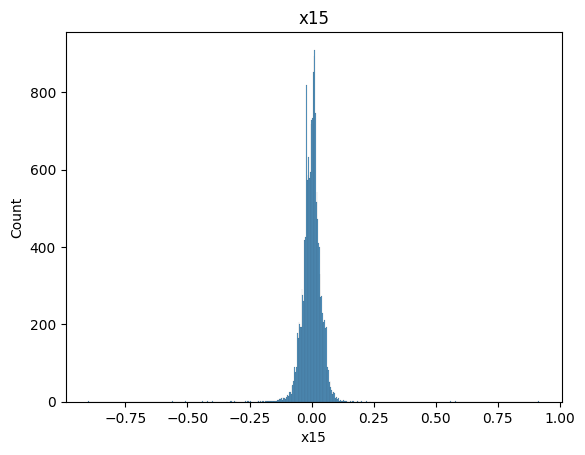

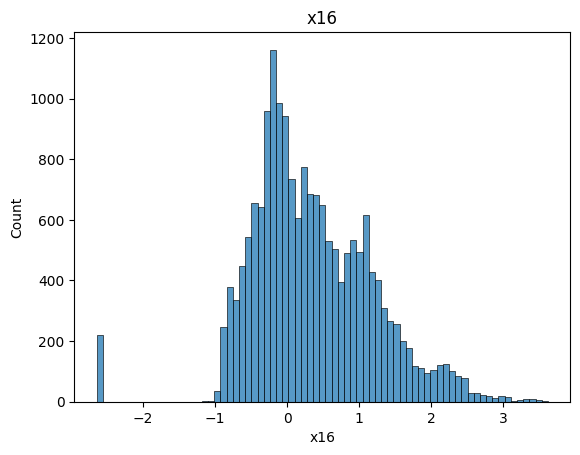

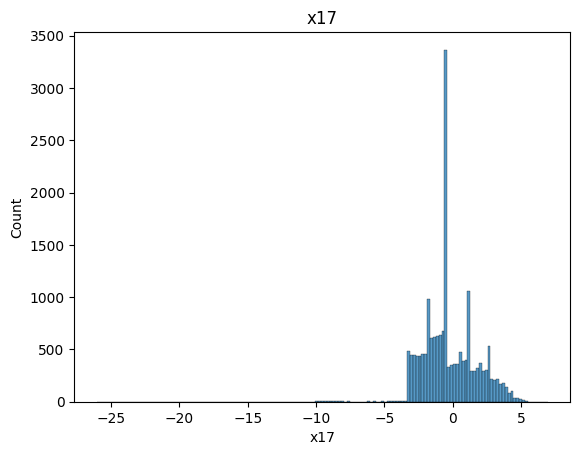

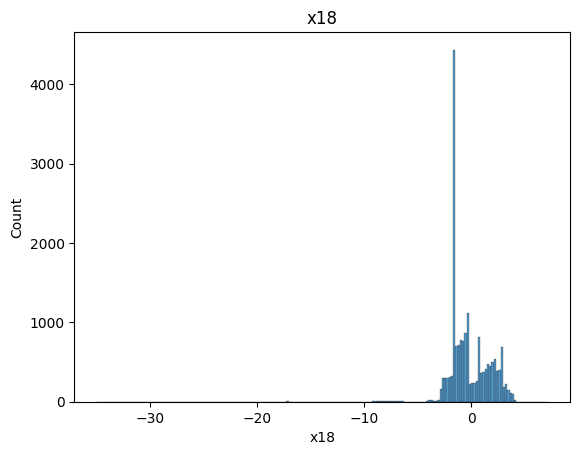

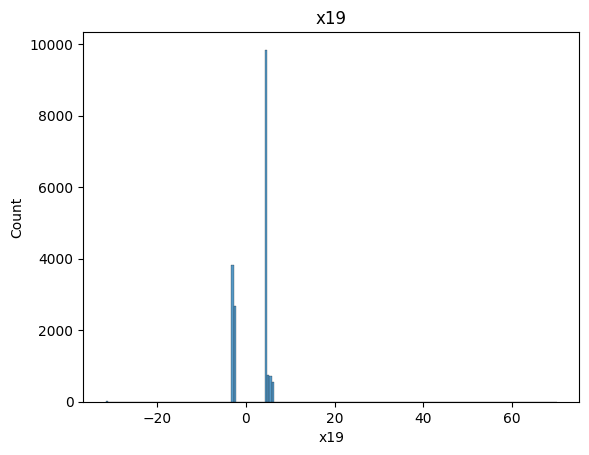

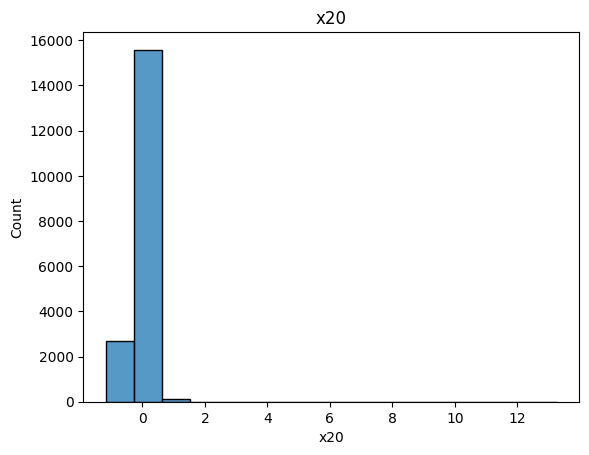

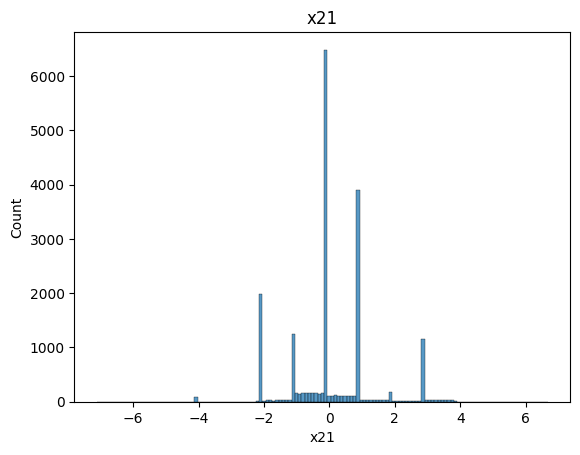

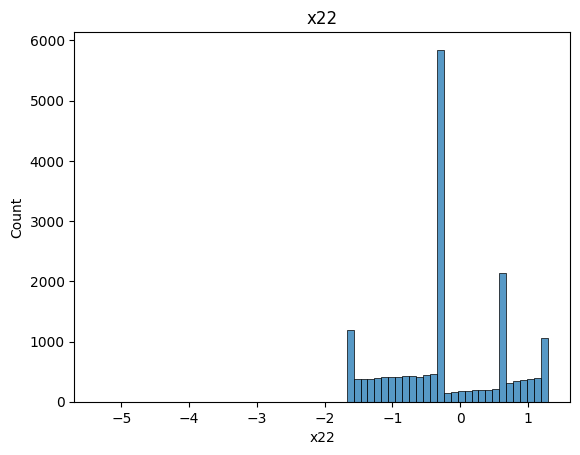

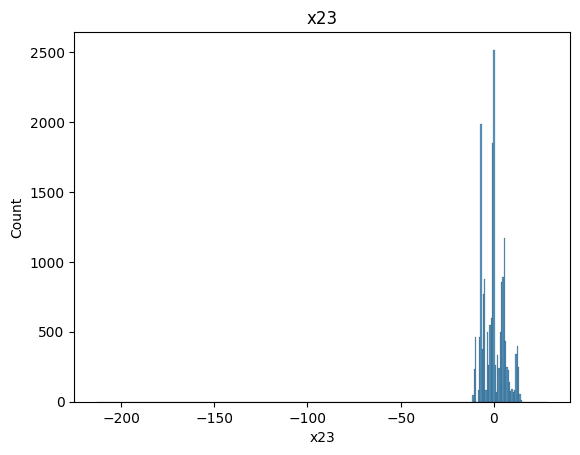

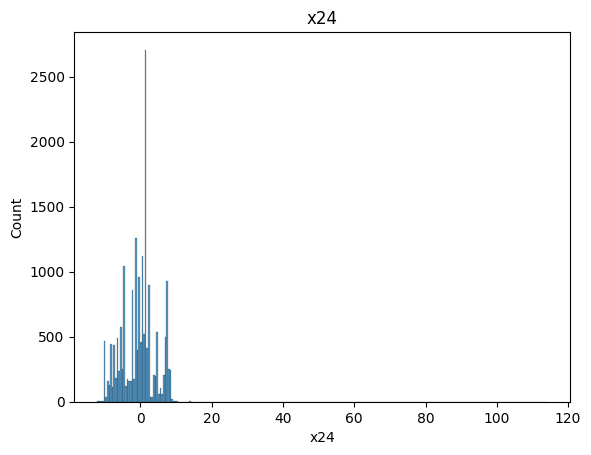

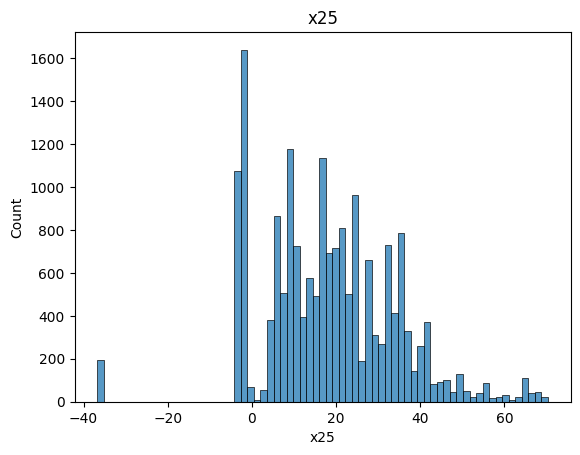

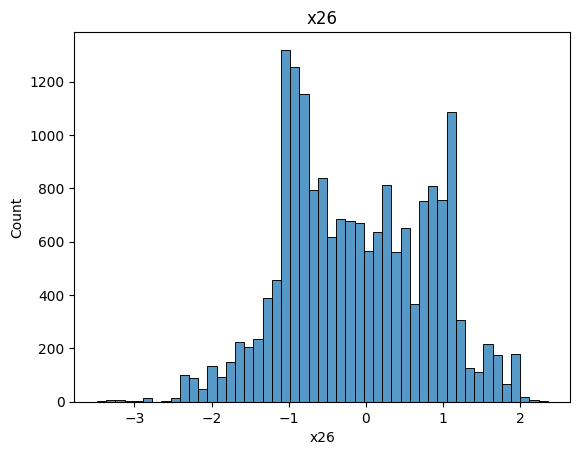

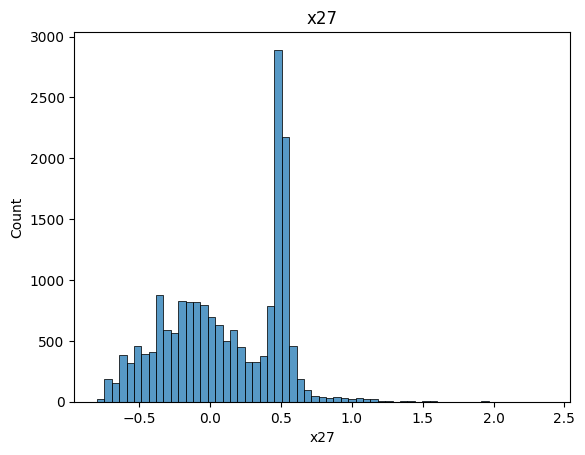

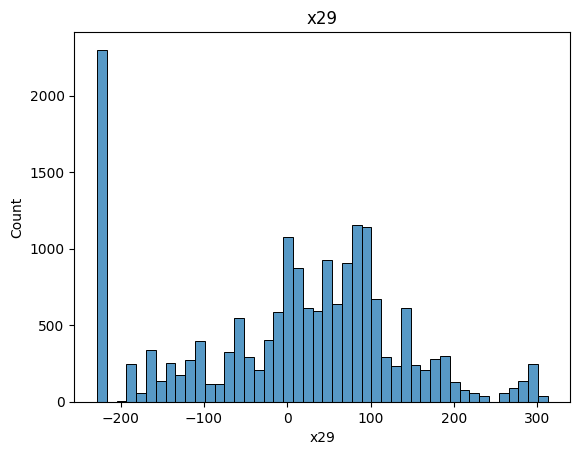

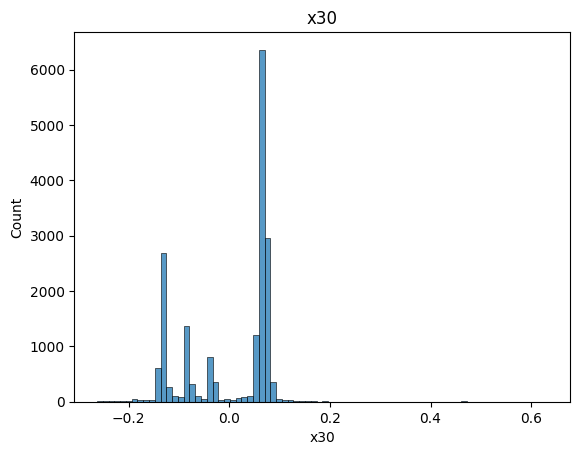

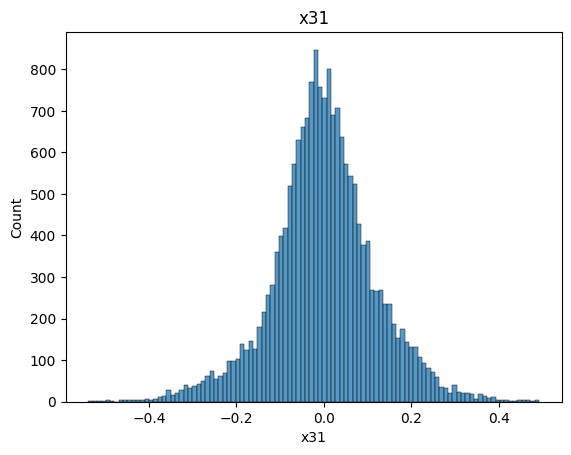

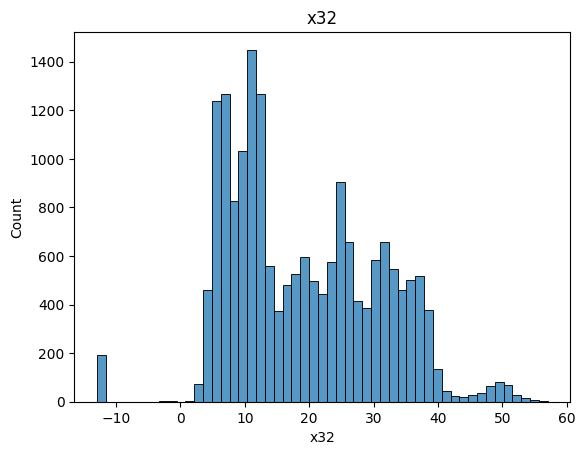

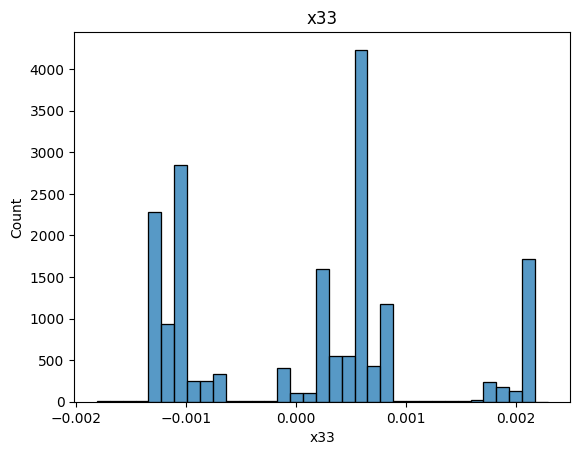

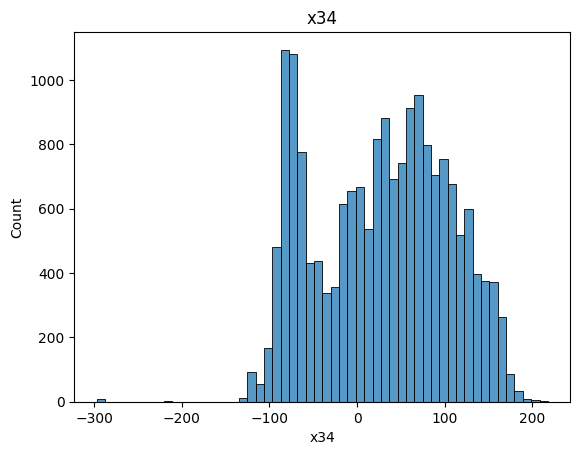

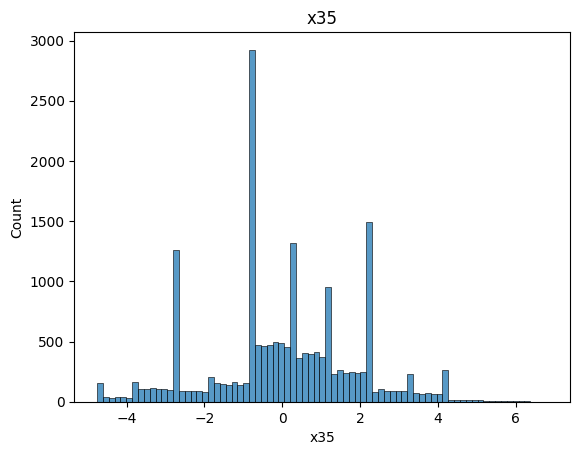

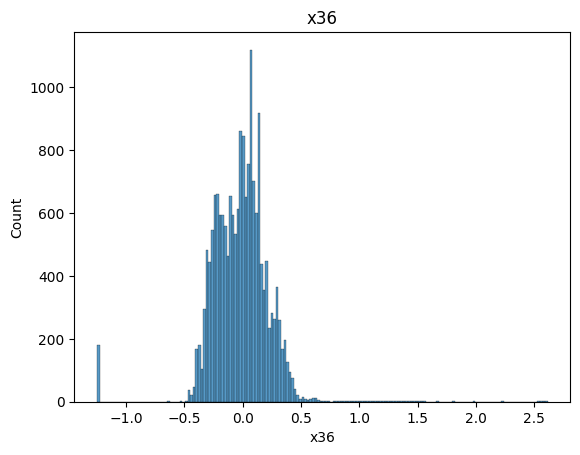

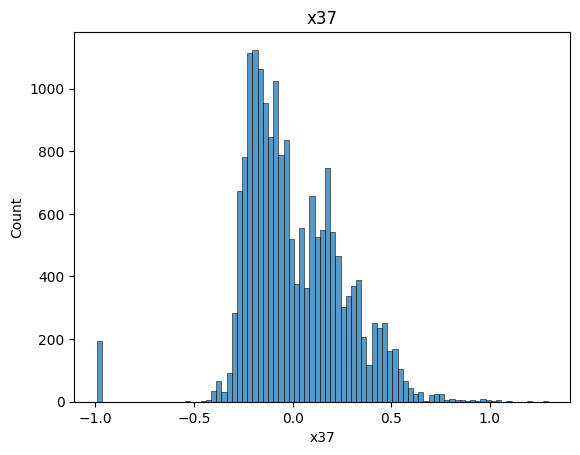

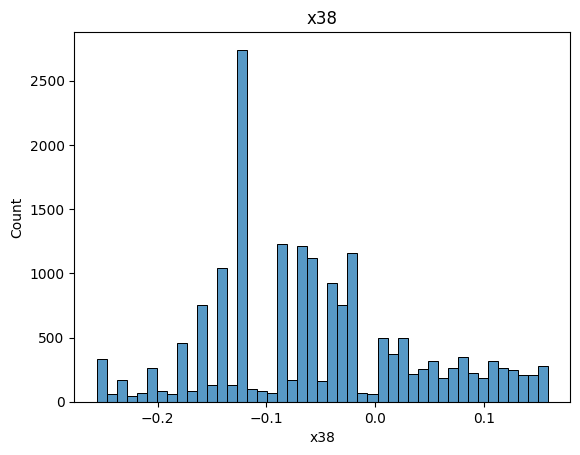

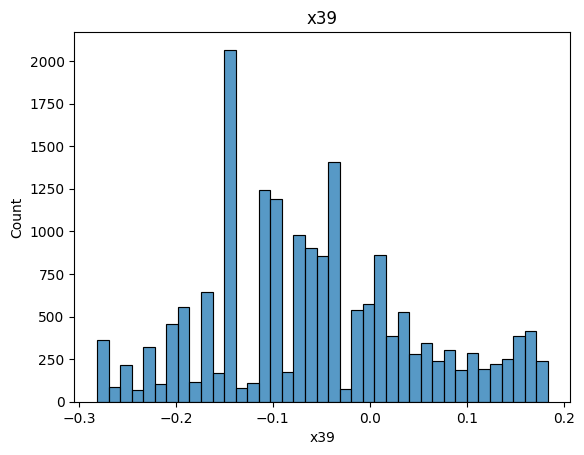

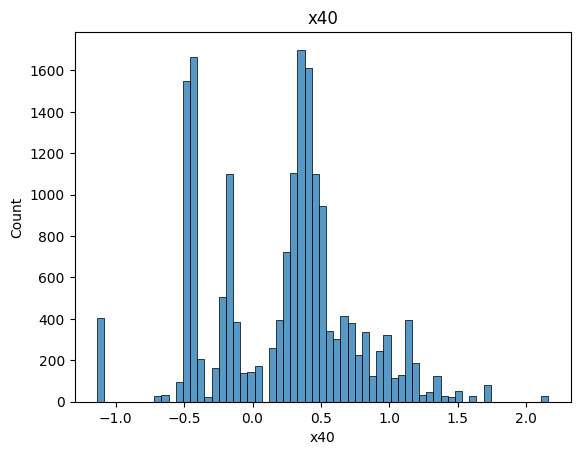

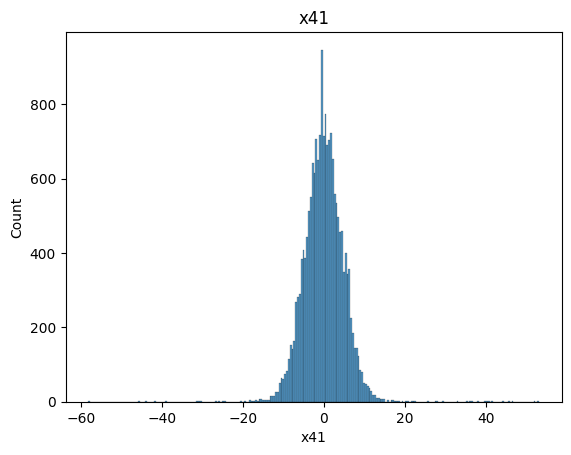

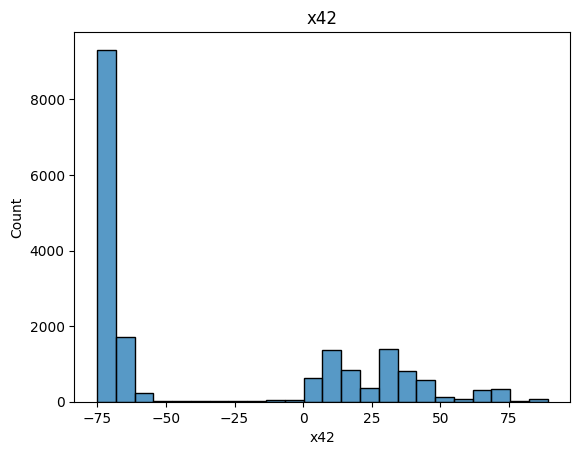

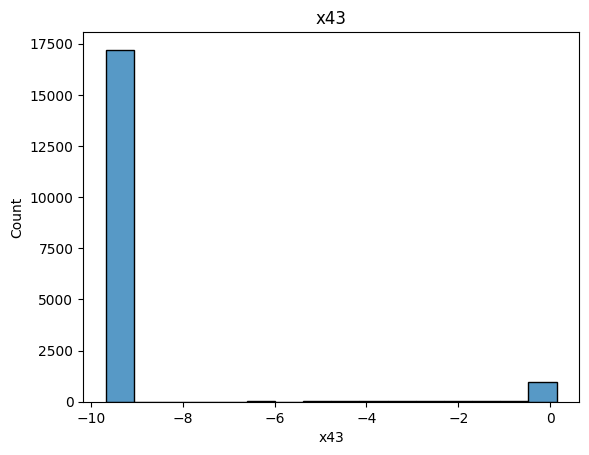

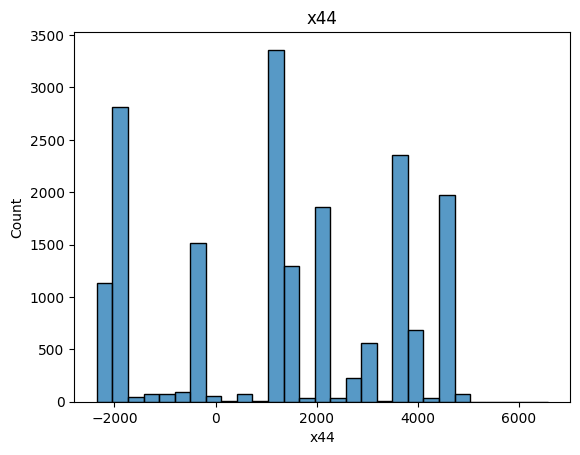

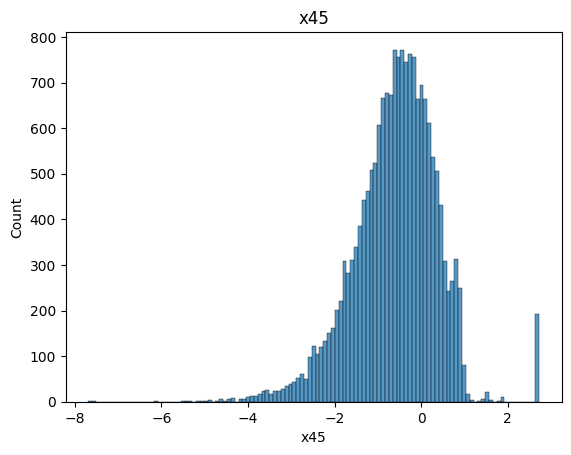

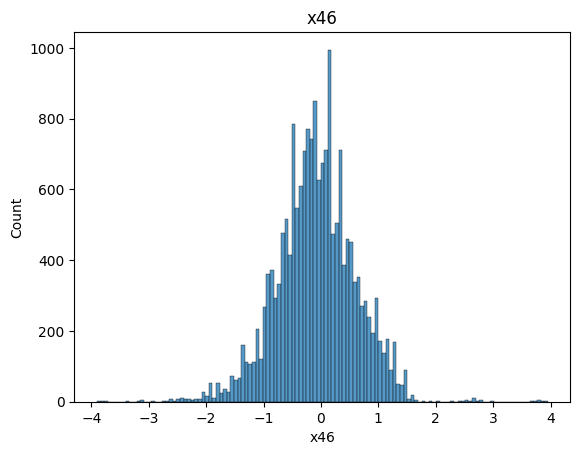

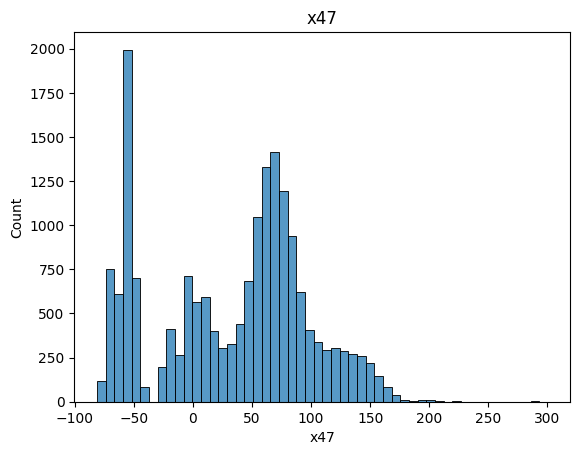

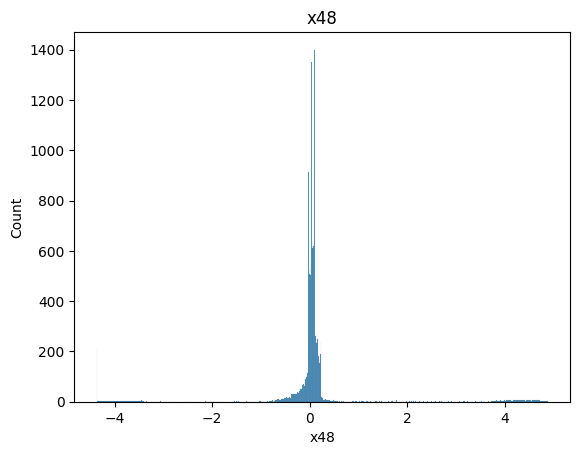

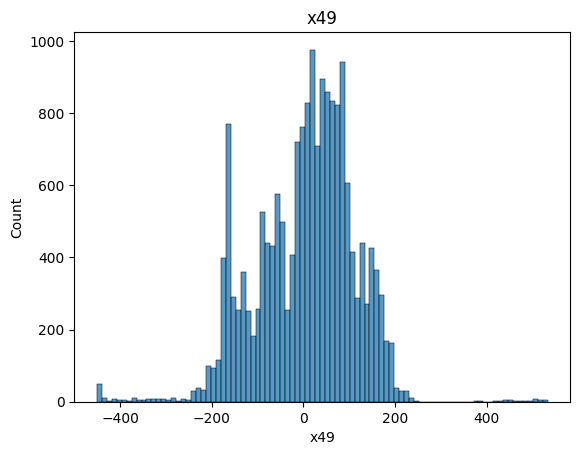

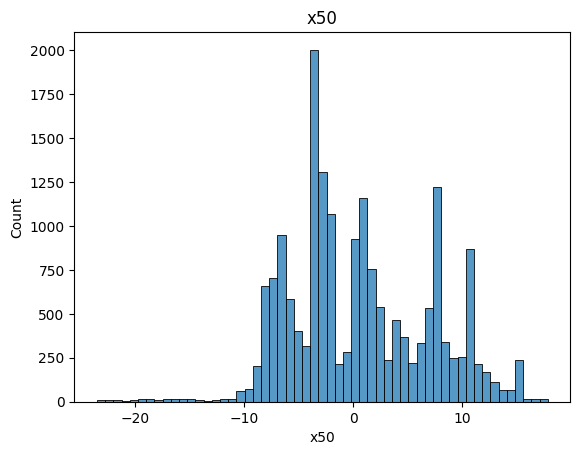

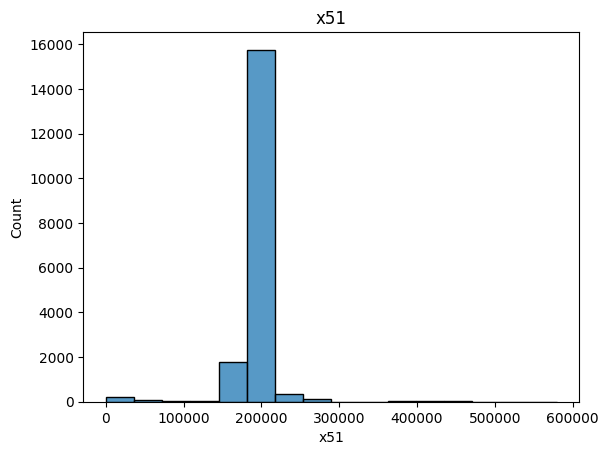

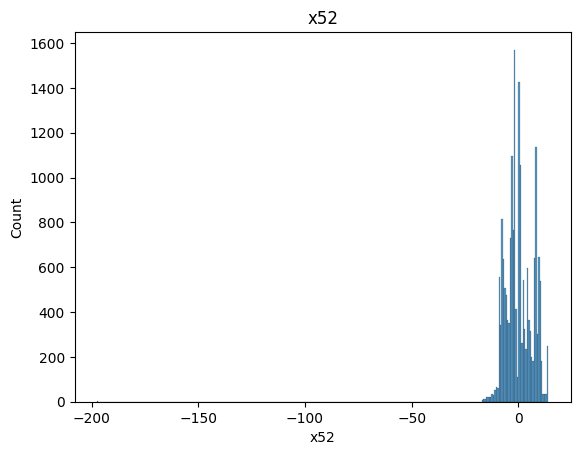

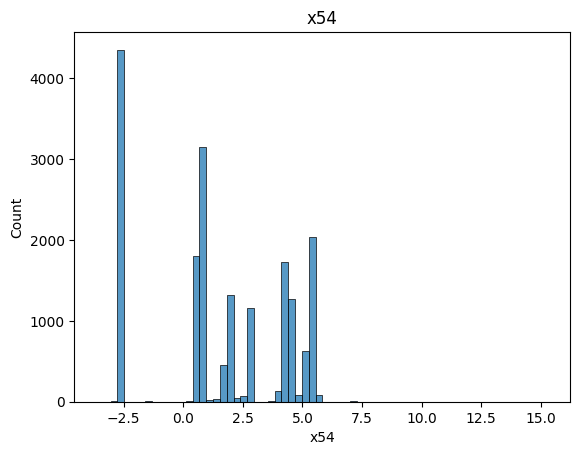

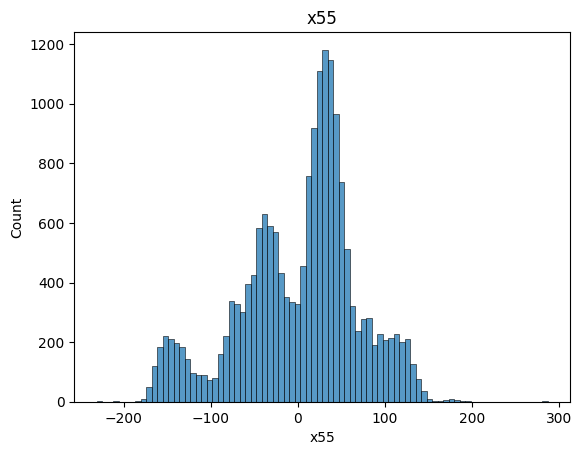

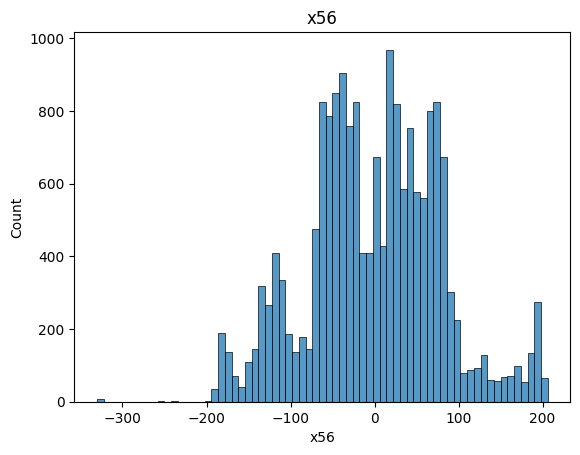

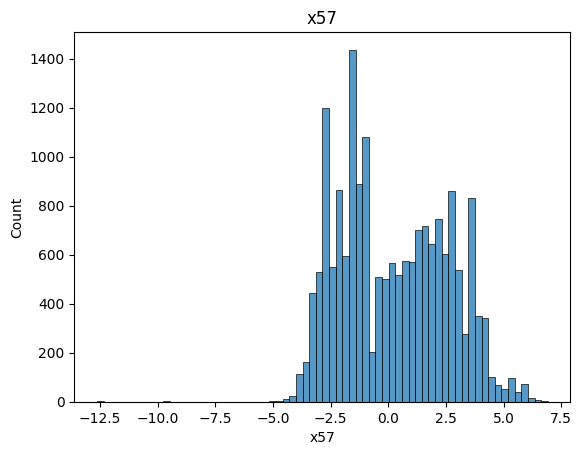

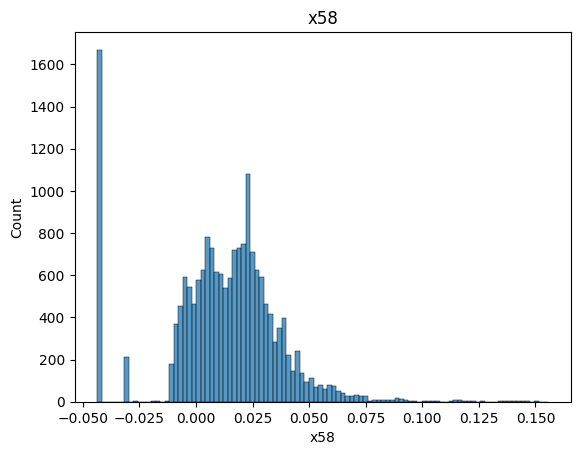

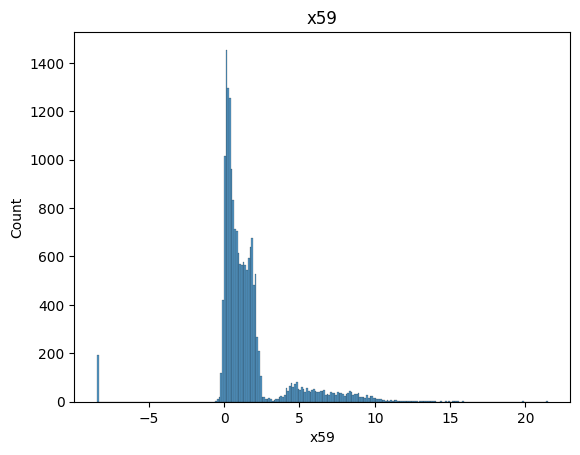

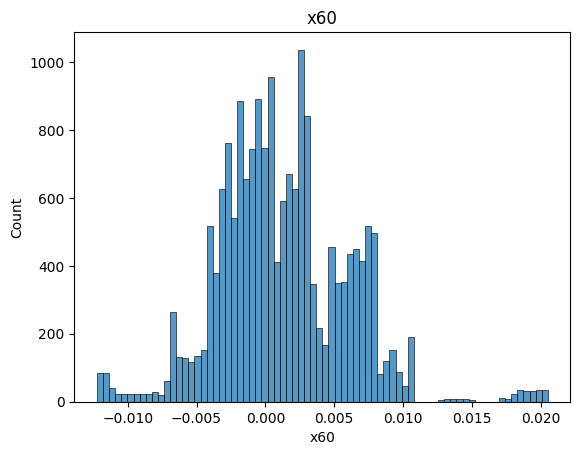

In [68]:
for c in df.select_dtypes(include=[np.number]).columns:
  if c not in descrete_features:

    sns.histplot(df[c])
    plt.title(c)
    plt.show()

Classifying dependent and independent variables

In [69]:
# by analysing I found that the outliers in the data are useful for getting the good accuracy so removing the outliers is not necessary oin this model .

x=df.drop(["y"],axis=1)
y=df["y"]

print(x)
print(len(y))


       y1        x1        x2        x3          x4        x5         x6  \
0       0  0.401236 -4.596435 -4.095756   13.497687 -0.123582 -15.931630   
1       0  0.514267 -4.542502 -4.018359   16.230659 -0.134305 -14.597546   
2       0  0.386826 -4.681394 -4.353147   14.127997 -0.145092 -13.949139   
3       0  0.317550 -4.758934 -4.023612   13.161566 -0.155507 -14.428679   
4       0  0.278035 -4.749928 -4.333150   15.267340 -0.163403 -13.715507   
...    ..       ...       ...       ...         ...       ...        ...   
18393   0 -0.772712  0.786430  0.406426  135.301215  0.108250  35.243834   
18394   0 -0.746157  0.633086  0.561918  133.228949  0.135020  34.324289   
18395   0 -0.732242  0.450126  0.334582  134.977973  0.161329  33.407284   
18396   0 -0.729280  0.419383  0.387263  135.658942  0.187210  32.492874   
18397   0 -0.743761  0.582710  0.593416  136.339880  0.212655  32.901309   

             x7        x8        x9  ...        x50            x51       x52  \
0      

In [70]:
# Counting the no of labels in the dependent variable
counter = collections.Counter(y)
print(" value counts",counter)

 value counts Counter({0: 18379, 1: 19})


Balancing the data in the dependent feature using Synthetic Minority Overfitting Technique

In [71]:
# The data in the dependent feature is not balanced so balancing the data using the SMOTE overfitting technique.
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y.ravel())
print('After OverSampling, the shape of X: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))
counter = collections.Counter(y_res)
print(" value counts",counter)


After OverSampling, the shape of X: (36758, 60)
After OverSampling, the shape of y: (36758,) 

After OverSampling, counts of label '1': 18379
After OverSampling, counts of label '0': 18379
 value counts Counter({0: 18379, 1: 18379})


Analysing the balanced data in dependent feature

       y1        x1        x2         x3          x4        x5         x6  \
0       0  0.401236 -4.596435  -4.095756   13.497687 -0.123582 -15.931630   
1       0  0.514267 -4.542502  -4.018359   16.230659 -0.134305 -14.597546   
2       0  0.386826 -4.681394  -4.353147   14.127997 -0.145092 -13.949139   
3       0  0.317550 -4.758934  -4.023612   13.161566 -0.155507 -14.428679   
4       0  0.278035 -4.749928  -4.333150   15.267340 -0.163403 -13.715507   
...    ..       ...       ...        ...         ...       ...        ...   
36753   1  0.927872 -8.951617  -9.756080  -67.162984  0.642711 -90.740984   
36754   1  0.109484 -8.826056 -10.449187  -32.265392  0.890770  29.936520   
36755   1 -0.266496 -9.782734 -10.547823  128.924470  0.438068  -1.941844   
36756   1 -0.203718 -8.846870  -9.703696   64.520679  0.815932 -19.417562   
36757   1 -0.458048 -8.832556  -9.879560  -72.136244  0.401012 -25.786973   

             x7        x8        x9  ...            x51       x52       x54

<Axes: xlabel='y'>

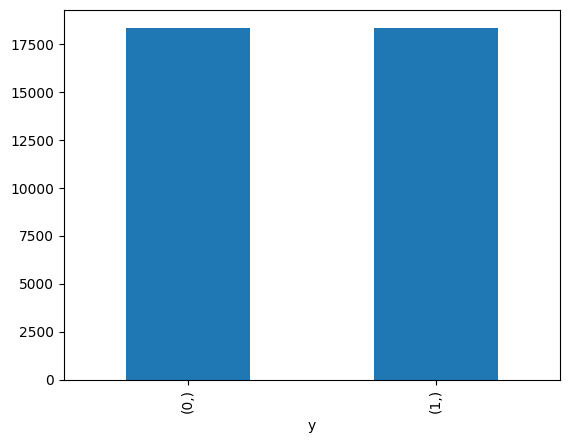

In [72]:
df_y = pd.DataFrame(y_res, columns=['y'])
df_resampled = pd.concat([x_res,df_y], axis=1)
print(df_resampled)
print(df_resampled.shape)
df_y.value_counts().plot(kind='bar')


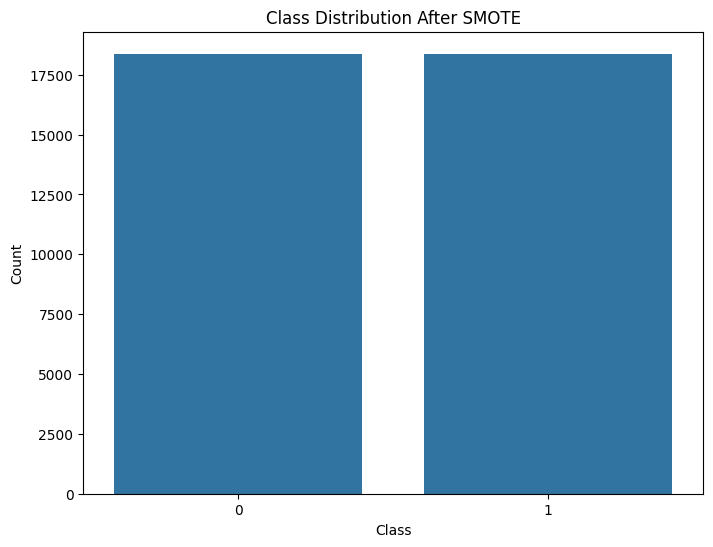

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x="y")
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
df_resampled['Category'] = df_resampled['y'].map({0: 'Class 0', 1: 'Class 1'})



Feature extraction using PCA

In [74]:
pca = PCA(n_components=12)

# Fit PCA on the data
pca.fit(x_res)

# Transform the data onto the new feature space
X_pcg = pca.transform(x_res)

# Output the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Display the transformed data
print("Transformed data shape:", X_pcg.shape)
print("Transformed data:")
print(X_pcg)


Explained variance ratio: [9.97939497e-01 2.03197852e-03 1.05217147e-05 8.56940642e-06
 3.15389174e-06 2.05305611e-06 1.59333135e-06 6.93219429e-07
 5.99937400e-07 3.46623978e-07 2.81873444e-07 1.68405466e-07]
Transformed data shape: (36758, 12)
Transformed data:
[[ 2.18059936e+03  7.90193481e+02  1.31537494e+02 ... -3.14384008e+01
   3.78490637e+01 -1.86724728e+01]
 [ 2.18051616e+03  8.20382888e+02  1.36116810e+02 ... -3.35242534e+01
   3.45491354e+01 -1.94848526e+01]
 [ 2.18051785e+03  8.17060258e+02  1.37305056e+02 ... -3.27121411e+01
   3.24801113e+01 -1.89295150e+01]
 ...
 [ 2.18806540e+03 -2.09254265e+03  2.95637856e+01 ... -1.72540345e+01
   2.21973574e-01  2.32405763e+01]
 [ 2.18773747e+03 -1.92660901e+03 -3.47410737e+01 ... -1.79225680e+01
   8.73446349e+00  2.10888775e+01]
 [-2.14470087e+04  1.79688564e+03  4.43509243e+01 ...  1.47693192e+01
   2.16068635e+01 -1.03821033e+01]]


Analysing the which is the good value for no of features parameter in PCA

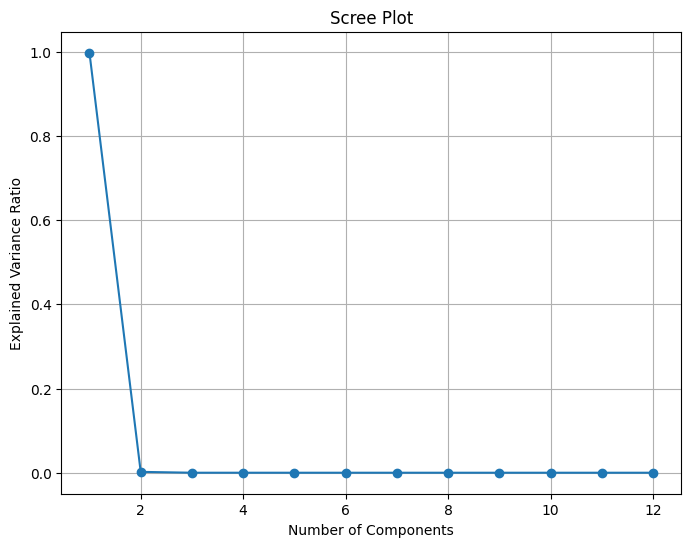

In [75]:


plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



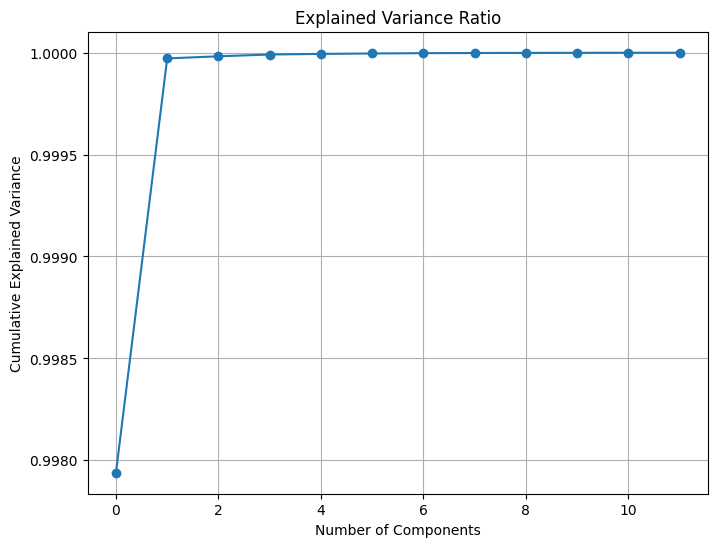

Number of components to retain: 1


In [76]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine the number of components to retain based on explained variance ratio
threshold = 0.95  # Set your desired threshold
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1
print(f"Number of components to retain: {n_components}")

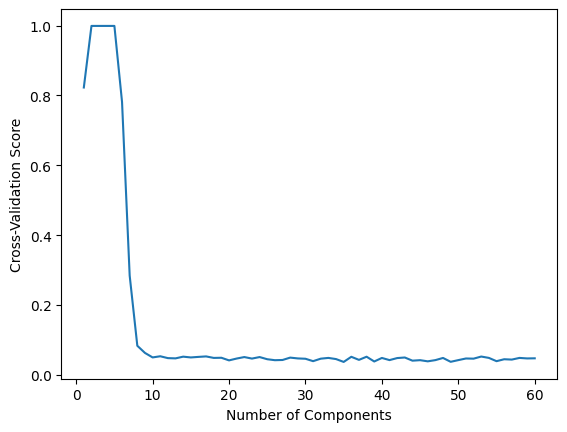

In [77]:
scores = []
for n in range(1, x.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(x)
    clf = LogisticRegression()
    score = cross_val_score(clf, X_pca, df.y, cv=5).mean()
    scores.append(score)

plt.plot(range(1, x.shape[1] + 1), scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.show()

Splitting the data into training and testing

In [78]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_pcg,y_res,test_size=0.2)
print(x_train1)



[[-3.51857499e+04  1.29071395e+03  1.64654218e+01 ...  6.13499113e+00
  -5.88970862e+00  1.92099575e+01]
 [ 2.18027270e+03  8.95137871e+02  1.78406259e+02 ... -6.33158621e+00
   3.90889662e+01 -1.41092510e+01]
 [ 2.17969699e+03  1.15602189e+03  7.17765159e+01 ... -2.08223674e+01
   5.61853146e+00  2.92611946e+01]
 ...
 [ 2.18263230e+03  2.62430637e+01 -1.01634861e+02 ... -2.86381984e+01
  -1.89588233e+01 -8.64582598e+00]
 [ 2.18040515e+03  8.57534552e+02 -4.13926199e+01 ... -2.33675177e+00
   1.52491327e+01 -2.36061997e+01]
 [-2.94820258e+04  2.37624272e+03  1.15993871e+02 ...  2.03853841e+01
   1.48612577e+01  3.05219127e+01]]


Building and Training the Model

In [79]:
log_res = LogisticRegression()
log_res.fit(x_train1,y_train1)

log_pres= log_res.predict(x_test1)

print(" Test accuracy is ", accuracy_score(y_test1,log_pres))
print(" Train accuracy is ", accuracy_score(y_train1 ,log_res.predict(x_train1)))
print(confusion_matrix(y_test1,log_pres))


 Test accuracy is  0.7610174102285092
 Train accuracy is  0.7532476365367612
[[2940  772]
 [ 985 2655]]


In [80]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(x_train1,y_train1)

# Make predictions on the testing set
y_pred = clf.predict(x_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
conf_matrix = confusion_matrix(y_test1, y_pred)
classification_rep = classification_report(y_test1, y_pred)

# Print the results
print("Decision tree model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Decision tree model
Accuracy: 0.9983677910772579
Confusion Matrix:
[[3703    9]
 [   3 3637]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3712
           1       1.00      1.00      1.00      3640

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



In [81]:
rfs = RandomForestClassifier()
rfs.fit(x_train1,y_train1)
rfs_pre = rfs.predict(x_test1)
print("random forest classifier ")

accuracy_rfs = accuracy_score(y_test1,rfs_pre)
conf_matrix_rfs = confusion_matrix(y_test1,rfs_pre)
classification_rep_rfs = classification_report(y_test1,rfs_pre)

# Print the results
print(f"Accuracy: {accuracy_rfs}")
print("Confusion Matrix:")
print(conf_matrix_rfs)
print("Classification Report:")
print(classification_rep_rfs)


random forest classifier 
Accuracy: 1.0
Confusion Matrix:
[[3712    0]
 [   0 3640]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3712
           1       1.00      1.00      1.00      3640

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



We have used PCA for feature extraction and the model performed well with Feature Extraction Technique . lets build the model using Feature Selection Technique.

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2)
print(x_train)
# standardising the data
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)
print(x_train)


       y1        x1        x2         x3          x4        x5         x6  \
16582   0 -0.114218  0.505649  -0.511812   30.958441  0.435413  61.977094   
17147   0 -0.248934  4.254884  -1.188041  116.848517 -0.289086  53.737470   
34087   1 -0.511087 -8.807990  -9.756530  -67.426795 -0.015711 -27.231628   
10752   0 -0.389898 -8.839359   1.483128   -5.866295  0.019062  46.655523   
22742   1 -0.466092 -8.807990 -10.078639  -63.330340  0.200200 -29.121169   
...    ..       ...       ...        ...         ...       ...        ...   
23722   1  0.640836 -8.917786  -9.763153 -120.505383 -0.427817 -39.054132   
11757   0 -0.559415 -0.723229   1.183441  -73.639123  0.712248 -16.808407   
25242   1  0.414438 -8.808342  -9.814331  255.585341 -0.319652  44.842292   
443     0  0.274705 -4.413121   5.837666  -23.246393 -0.385385 -14.552225   
15140   0  0.381805 -0.186511  -5.947565   88.215828  0.657790 -40.535116   

             x7        x8        x9  ...        x50            x51        x

Getting the important features using Recursive Feature Elimination Method

In [83]:
log = LogisticRegression()
rfe=RFE(log)
l=rfe.fit(x,y)

print("Num Features: %d" % l.n_features_)
print("Selected Features",x.columns[l.support_])
print("Feature Ranking: %s" % l.ranking_)


Num Features: 30
Selected Features Index(['y1', 'x1', 'x2', 'x3', 'x6', 'x12', 'x13', 'x17', 'x18', 'x21', 'x22',
       'x23', 'x24', 'x26', 'x28', 'x34', 'x35', 'x40', 'x41', 'x42', 'x43',
       'x47', 'x48', 'x50', 'x52', 'x54', 'x55', 'x56', 'x57', 'x59'],
      dtype='object')
Feature Ranking: [ 1  1  1  1  6 26  1  9  7 14 20 24  1  1 23 12 10  1  1 19  8  1  1  1
  1  4  1  5  1 21 25 29 13 30  1  1  2 27 15 17  1  1  1  1 22  3 11  1
  1 18  1 28  1  1  1  1  1 16  1 31]


Getting the Feature Importance using ExtraTree Classifier

In [84]:
c= ExtraTreesRegressor()
lc=c.fit(x,y)
print(x.columns)
print(lc.feature_importances_)


Index(['y1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')
[4.10965235e-02 1.54545567e-03 3.25275190e-02 2.51053133e-03
 0.00000000e+00 3.70977101e-03 4.68319901e-04 1.05371978e-03
 3.95144917e-04 0.00000000e+00 3.51239926e-04 9.22004805e-04
 8.62134363e-04 1.13655938e-03 0.00000000e+00 1.48275510e-03
 7.76050377e-04 3.64203998e-01 2.55707147e-01 2.45868412e-01
 0.00000000e+00 0.00000000e+00 1.16347145e-02 1.58003517e-03
 1.58037901e-03 5.07346560e-04 0.00000000e+00 0.00000000e+00
 5.42124689e-04 2.63429944e-04 0.00000000e+00 0.00000000e+00
 4.99130421e-04 8.78071150e-04 6.8049

Building the Model and Performing Hyper Parameter Tuning

In [94]:


log_reg = LogisticRegression(penalty='l2')


log_reg.fit(x_train,y_train)
log_pre= log_reg.predict(x_test)

print(" Test accuracy is ", accuracy_score(y_test,log_pre))
print(" Train accuracy is ", accuracy_score(y_train ,log_reg.predict(x_train)))
print(confusion_matrix(y_test,log_pre))
# Evaluate the model
accuracy = accuracy_score(y_test,log_pre)
precision = precision_score(y_test,log_pre)
recall = recall_score(y_test, log_pre)
f1 = f1_score(y_test, log_pre)
roc_auc = roc_auc_score(y_test,log_pre)
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


 Test accuracy is  1.0
 Train accuracy is  1.0
[[3634    0]
 [   0 3718]]
Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


Hyper Parameter Tuning

In [86]:
k_fold= 10


kf = KFold(n_splits= k_fold, shuffle = True, random_state= 42 )


cross_val_res = cross_val_score(log_reg, x, y , cv= kf)



print("cross validation results " ,cross_val_res)
print("mean accuracy ",cross_val_res.mean() )
print("f1 score",f1_score(y_test, log_pre,average='macro'))

cross validation results  [0.99836957 0.99836957 0.99945652 0.99891304 0.99021739 0.99836957
 0.99945652 0.99076087 0.99945623 0.99836868]
mean accuracy  0.9971737948317848
f1 score 1.0


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(x_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.9997959588508826


In [99]:
clf1 = DecisionTreeClassifier(criterion= 'gini',random_state=42)

# Train the classifier
clf1.fit(x_train,y_train)

# Make predictions on the testing set
y_pred = clf1.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Decision tree model")
print(f"Accuracy for test: {accuracy}")
print("Accuracy for train", accuracy_score(y_train,clf1.predict(x_train)) )
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Decision tree model
Accuracy for test: 0.999455930359086
Accuracy for train 1.0
Confusion Matrix:
[[3631    3]
 [   1 3717]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3718

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



In [98]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier()

tree_cv = RandomizedSearchCV(rf_model, param_grid, cv=5)
tree_cv.fit(x_train, y_train)

print("Tuned Random Forest  Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Random Forest  Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best score is 1.0


In [101]:
rfs = RandomForestClassifier()
rfs.fit(x_train,y_train)
rfs_pre = rfs.predict(x_test)
print("random forest classifier ")

accuracy_rfs = accuracy_score(y_test,rfs_pre)
conf_matrix_rfs = confusion_matrix(y_test,rfs_pre)
classification_rep_rfs = classification_report(y_test,rfs_pre)

# Print the results
print(f"Accuracy test: {accuracy_rfs}")
print("Accuracy  train",accuracy_score(y_train, rfs.predict(x_train)) )
print("Confusion Matrix:")
print(conf_matrix_rfs)
print("Classification Report:")
print(classification_rep_rfs)



random forest classifier 
Accuracy test: 1.0
Accuracy  train 1.0
Confusion Matrix:
[[3634    0]
 [   0 3718]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3718

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352

